In [1]:
import pandas as pd
import numpy as np
import glob
import seaborn as sns
import matplotlib.pyplot as plt
from utils.utils import entropia

In [2]:
print(pd.__version__)

1.4.1


In [3]:
carpeta="data/Only_training_hipotesis_salida/"

## Abrir los pickles obtenidos con las siguientes columnas
### Main index - Hace referencia al índice del ejemplo de ese corpus TEST
### Text - Hace referencia a los tokens usados para el Texto (Se añade NULL al principio para el procesamiento)
### Hipótesis - Hace referencia a los tokens usados para la Hipótesis (Se añade NULL al principio para el procesamiento)
### R_Text - Hace referencia a los embeddings de los tokens usados para el Texto (Se añade NULL al principio para el procesamiento)
### R_Hip - Hace referencia a los embeddings de los tokens usados para la Hipótesis (Se añade NULL al principio para el procesamiento)
### M_Align - Hace referencia a la matriz de alineamiento de los tokens del Texto y de la Hipótesis 
### Prediction - Hace referencia a la predicción del modelo para ese ejemplo
### Gol_label - Etiqueta correcta del ejemplo
### Idx - Número de ejemplo, el primero es el real y los deḿas son con la hipótesis parafraseada

In [4]:
def mayorEtiqueta(a,b,c):
    if a > b and a > c:
        return 'entailment'
    elif c > a and c > b:
        return 'contradiction'
    else:
        return 'neutral'

In [5]:
print(carpeta+"entropia/resultados_entropiaZSCORE_Transponse.pickle")

data/Only_training_hipotesis_salida/entropia/resultados_entropiaZSCORE_Transponse.pickle


In [6]:
dfn=pd.read_pickle(carpeta+"entropia/resultados_entropiaZSCORE_Transponse.pickle")

In [7]:
dfn

,Docs,grupo,muestreo,Total,Subtotal,E_P,entropia,Paraphrase
0,data/Only_training_hipotesis_salida/pTEST_new_...,20.0,9.csv.pickle,430,375,entailment_entailment,"[5.94, 6.091, 5.977, 5.14, 4.5, 7.294, 5.934, ...",0
1,data/Only_training_hipotesis_salida/pTEST_new_...,20.0,9.csv.pickle,430,45,entailment_neutral,"[4.925, 5.697, 6.468, 6.644, 5.838, 5.648, 6.3...",0
2,data/Only_training_hipotesis_salida/pTEST_new_...,20.0,9.csv.pickle,430,10,entailment_contradiction,"[6.484, 5.418, 5.457, 6.263, 6.562, 6.208, 6.4...",0
3,data/Only_training_hipotesis_salida/pTEST_new_...,20.0,9.csv.pickle,497,46,neutral_entailment,"[4.845, 6.267, 5.742, 5.17, 6.348, 7.136, 4.69...",0
4,data/Only_training_hipotesis_salida/pTEST_new_...,20.0,9.csv.pickle,497,408,neutral_neutral,"[5.258, 6.841, 6.229, 7.499, 7.28, 6.21, 6.22,...",0
...,...,...,...,...,...,...,...,...
2173,data/Only_training_hipotesis_salida/pTEST_new_...,50.0,12.csv.pickle,1183,923,neutral_neutral,"[6.203, 6.503, 5.247, 5.719, 6.26, 4.107, 4.83...",1
2174,data/Only_training_hipotesis_salida/pTEST_new_...,50.0,12.csv.pickle,1183,127,neutral_contradiction,"[6.366, 6.515, 6.774, 4.964, 6.336, 5.715, 6.1...",1
2175,data/Only_training_hipotesis_salida/pTEST_new_...,50.0,12.csv.pickle,1149,66,contradiction_entailment,"[5.64, 5.447, 4.564, 6.107, 6.587, 5.447, 6.21...",1
2176,data/Only_training_hipotesis_salida/pTEST_new_...,50.0,12.csv.pickle,1149,149,contradiction_neutral,"[5.213, 5.918, 5.273, 7.148, 6.759, 6.395, 5.2...",1


In [8]:
dfn=dfn.assign(relacion=dfn["Subtotal"]/dfn["Total"])
dfn

,Docs,grupo,muestreo,Total,Subtotal,E_P,entropia,Paraphrase,relacion
0,data/Only_training_hipotesis_salida/pTEST_new_...,20.0,9.csv.pickle,430,375,entailment_entailment,"[5.94, 6.091, 5.977, 5.14, 4.5, 7.294, 5.934, ...",0,0.872093
1,data/Only_training_hipotesis_salida/pTEST_new_...,20.0,9.csv.pickle,430,45,entailment_neutral,"[4.925, 5.697, 6.468, 6.644, 5.838, 5.648, 6.3...",0,0.104651
2,data/Only_training_hipotesis_salida/pTEST_new_...,20.0,9.csv.pickle,430,10,entailment_contradiction,"[6.484, 5.418, 5.457, 6.263, 6.562, 6.208, 6.4...",0,0.023256
3,data/Only_training_hipotesis_salida/pTEST_new_...,20.0,9.csv.pickle,497,46,neutral_entailment,"[4.845, 6.267, 5.742, 5.17, 6.348, 7.136, 4.69...",0,0.092555
4,data/Only_training_hipotesis_salida/pTEST_new_...,20.0,9.csv.pickle,497,408,neutral_neutral,"[5.258, 6.841, 6.229, 7.499, 7.28, 6.21, 6.22,...",0,0.820926
...,...,...,...,...,...,...,...,...,...
2173,data/Only_training_hipotesis_salida/pTEST_new_...,50.0,12.csv.pickle,1183,923,neutral_neutral,"[6.203, 6.503, 5.247, 5.719, 6.26, 4.107, 4.83...",1,0.780220
2174,data/Only_training_hipotesis_salida/pTEST_new_...,50.0,12.csv.pickle,1183,127,neutral_contradiction,"[6.366, 6.515, 6.774, 4.964, 6.336, 5.715, 6.1...",1,0.107354
2175,data/Only_training_hipotesis_salida/pTEST_new_...,50.0,12.csv.pickle,1149,66,contradiction_entailment,"[5.64, 5.447, 4.564, 6.107, 6.587, 5.447, 6.21...",1,0.057441
2176,data/Only_training_hipotesis_salida/pTEST_new_...,50.0,12.csv.pickle,1149,149,contradiction_neutral,"[5.213, 5.918, 5.273, 7.148, 6.759, 6.395, 5.2...",1,0.129678


In [9]:
etiquetas=['entailment','neutral','contradiction']

In [10]:
dfn_sinparafraseo=dfn[dfn["Paraphrase"]==0]
dfn_conparafraseo=dfn[dfn["Paraphrase"]==1]

# Vamos a dibujar la relación de aciertos (grupal) y errores

<AxesSubplot:xlabel='grupo', ylabel='relacion'>

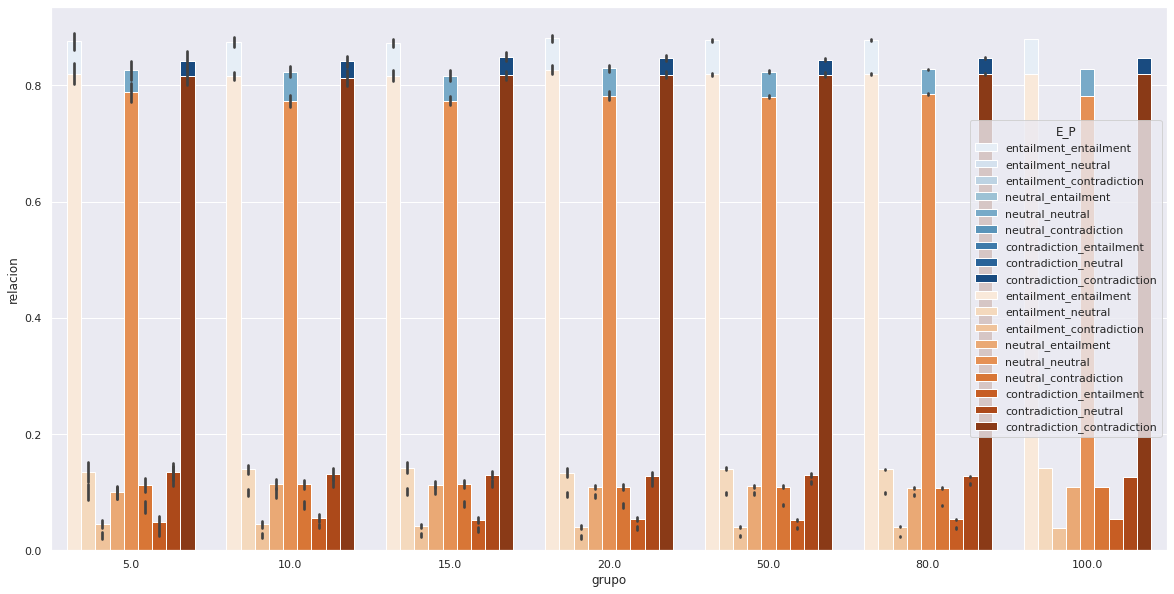

In [11]:
sns.set(rc={"figure.figsize":(20, 10)})
sns.barplot(data=dfn_sinparafraseo,x="grupo",y="relacion", hue="E_P",palette="Blues")
sns.barplot(data=dfn_conparafraseo,x="grupo",y="relacion", hue="E_P",palette="Oranges")

<AxesSubplot:xlabel='grupo', ylabel='relacion'>

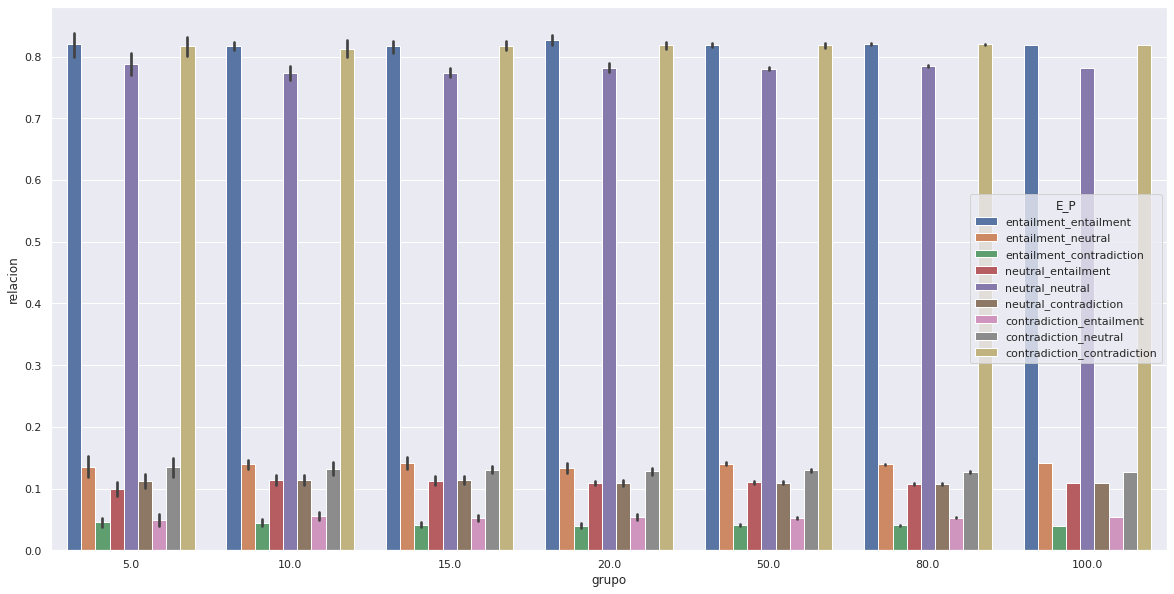

In [12]:
sns.set(rc={"figure.figsize":(20, 10)})
sns.barplot(data=dfn_conparafraseo,x="grupo",y="relacion", hue="E_P")

## Los anteriores resultados muestran que en cada muestreo hay una gran diferencia de los aciertos vs los errores un promedio de 80 % para los casos de entailment_entailment, neutral_neutral y contradiction_contradiction.

## Por otro lado, existe un porcentaje alto (relativamente) de los X_neutral, es decir que a partir del texto no se logré decidir si es entailment o contradiction. 18% promedio de errores cuando en realidad es entailment y predice neutralidad y 12% promedio cuando debería ser contradiction. lo mismo ocurre cuando es neutralidad y predice entailment o contradiction con 10% cada uno. Y en los ultimos casos donde se parte de un entailment y predice una contradiction con un 5% y que con un target contradiction lleva a una prediccion de entailment con 5%.

##


In [13]:
labels=[]
for e1 in etiquetas:
    for e2 in etiquetas:
        labels.append(e1+"_"+e2)
labels

['entailment_entailment',
 'entailment_neutral',
 'entailment_contradiction',
 'neutral_entailment',
 'neutral_neutral',
 'neutral_contradiction',
 'contradiction_entailment',
 'contradiction_neutral',
 'contradiction_contradiction']

# Matriz de alineamiento
# Procesar todos los archivos p*.pickle para agregar columnas que obtengan los POS que tienen más que un umbral

In [14]:
muestreos=['0.05','0.1','0.15','0.2','0.5','0.8','1']

In [15]:
#POS donde encuentra coincidencia
#pos=['DET','AUX','NOUN','PROPN','CONJ','VERB','ADP','ADV','NUM','ADJ','PART','PRON','X','CCONJ','PUNCT','INTJ','SYM']

In [16]:
pos=['NOUN','VERB','ADV','ADJ']

In [17]:
# new_data = {'Docs' : [], 'grupo': [], 'datos': [],'minimo':[],'maximo':[],'3quartile':[]}
# for g in muestreos:
#     a=glob.glob(carpeta+'p*_'+g+'_*.pickle')
#     for e in a:
#         min_max=[]
#         temp=pd.read_pickle(e)
#         df=temp.copy()
#         temp=temp.assign(ma_umbral="")
#         for indice,strings in df.iterrows():
#             t=strings['Text']
#             h=strings['Hipotesis']
#             matriz=strings['M_Align']
#             matriz_c=matriz[1:len(t)-1,1:len(h)-1]
#             min_max.extend(matriz_c.flatten())
#             # Se coloca el máximo de tokens de acuerdo a la configuración del parafraseo
#             if(len(t[1:-1])>41):
#                 p1_df1=pd.DataFrame(matriz_c,columns=h[1:-1],index=t[1:42])
#             elif(len(h[1:-1])>41):
#                 p1_df1=pd.DataFrame(matriz_c,columns=h[1:42],index=t[1:-1])
#             else:
#                 p1_df1=pd.DataFrame(matriz_c,columns=h[1:-1],index=t[1:-1])
#             c_a=p1_df1.columns
#             data=pd.DataFrame("",columns=pos,index=pos)
#             umbral = np.quantile(np.asarray(min_max),q=0.75)
#             for i,strings2 in p1_df1.iterrows():
#                 for j in range(len(c_a)):
#                     if(strings2[j]>umbral):
#                         if(i.split(',')[1][:-1]!='' and c_a[j].split(',')[1][:-1]!='' and i.split(',')[1][:-1] in pos and c_a[j].split(',')[1][:-1] in pos):
#                             data.at[i.split(',')[1][:-1],c_a[j].split(',')[1][:-1]]=str(data.at[i.split(',')[1][:-1],c_a[j].split(',')[1][:-1]])+","+str(strings2[j])
#             temp.at[indice,'ma_umbral']=data
#             temp.at[indice,'target_prediction']=mayorEtiqueta(strings['Gold_label'][0],strings['Gold_label'][1],strings['Gold_label'][2])+"_"+mayorEtiqueta(strings['Prediction'][0],strings['Prediction'][1],strings['Prediction'][2])
#         temp.to_pickle(e)
#         new_data['Docs'].append(e)
#         new_data['grupo'].append(g)
#         new_data['datos'].append(min_max[:])
#         new_data['3quartile'].append(np.quantile(np.asarray(min_max),q=0.75))
#         new_data['minimo'].append(np.min(np.asarray(min_max)))
#         new_data['maximo'].append(np.max(np.asarray(min_max)))
#         min_max.clear()
# df_resume=pd.DataFrame(new_data)
# df_resume.to_pickle(carpeta+"align/data_POS_ALIGN.pickle")

# Identificación de umbral de alineamiento para obtener el 60% de los valores mayores al umbral

In [18]:
df=pd.read_pickle(carpeta+"align/data_POS_ALIGN.pickle")

In [19]:
df

,Docs,grupo,datos,minimo,maximo,3quartile
0,data/Only_training_hipotesis_salida/pTEST_new_...,0.05,"[0.02611161, 0.045506727, 0.014831392, 0.02399...",0.0,9.173684,0.480597
1,data/Only_training_hipotesis_salida/pTEST_new_...,0.05,"[0.010360673, 4.502125, 0.51946324, 0.01036067...",0.0,8.644469,0.475812
2,data/Only_training_hipotesis_salida/pTEST_new_...,0.05,"[0.0048709577, 0.58782685, 0.5141004, 0.026913...",0.0,9.032872,0.505766
3,data/Only_training_hipotesis_salida/pTEST_new_...,0.05,"[0.09429762, 0.014831392, 0.027675167, 0.02611...",0.0,8.699710,0.462216
4,data/Only_training_hipotesis_salida/pTEST_new_...,0.05,"[0.02611161, 0.07318912, 0.017348034, 0.005197...",0.0,9.032872,0.483129
...,...,...,...,...,...,...
116,data/Only_training_hipotesis_salida/pTEST_new_...,0.8,"[0.02611161, 0.045506727, 0.0042517097, 0.0261...",0.0,9.173684,0.472073
117,data/Only_training_hipotesis_salida/pTEST_new_...,0.8,"[0.02611161, 0.0, 0.043464534, 0.046227895, 0....",0.0,9.173684,0.473151
118,data/Only_training_hipotesis_salida/pTEST_new_...,0.8,"[0.02611161, 0.045506727, 0.008231887, 0.02611...",0.0,9.173684,0.472120
119,data/Only_training_hipotesis_salida/pTEST_new_...,0.8,"[0.02611161, 0.0, 0.0034624161, 0.020057324, 0...",0.0,9.173684,0.471620


In [20]:
umbral=df['3quartile'].mean()
umbral

0.47266921862836714

In [21]:
data = df['datos'][0]
data.sort()
len(data)

76136

In [22]:
#Vamos a eliminar los ceros
nueva_data=[]
for e in data:
    if e!=0.0:
        nueva_data.append(e)
print(len(nueva_data))

74497


In [23]:
#Como ya esta ordenado nos vamos a quedar con el 40% de los datos y el ultimo será el umbral
nd=nueva_data[:round(len(nueva_data)*0.5)]
nd[-1]

0.08291003

In [24]:
np.median(nueva_data)

0.08291003

In [25]:
print(np.quantile(nueva_data,q=0.25))
print(np.quantile(nueva_data,q=0.5))
print(np.quantile(nueva_data,q=0.75))
print(np.quantile(nueva_data,q=1))

0.02036144584417343
0.08291003108024597
0.4993229806423187
9.173684


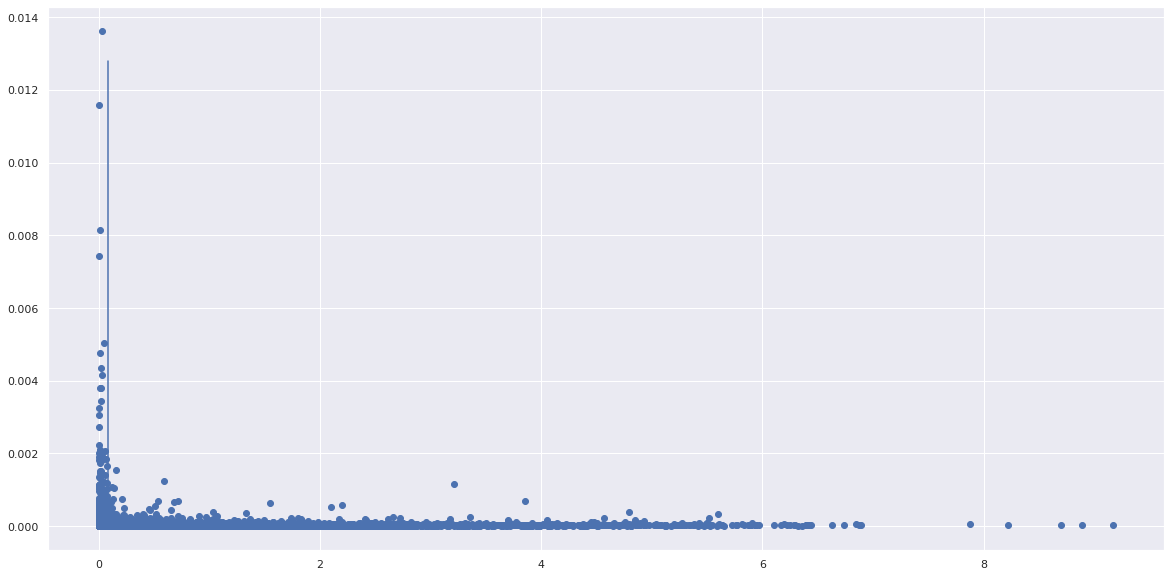

In [26]:
# Vamos a dibujar el umbral y la distribución de los datos
min_d=min(nueva_data)
max_d=max(nueva_data)
tamanio=len(nueva_data)
unicos = list(set(nueva_data))
y = [ nueva_data.count(x)/tamanio for x in unicos]
fig, ax = plt.subplots()
ax.scatter(x = unicos, y = y)
plt.axvline(x=nd[-1], ymin=0.1, ymax=0.9)
plt.show() #dibujamos el histograma

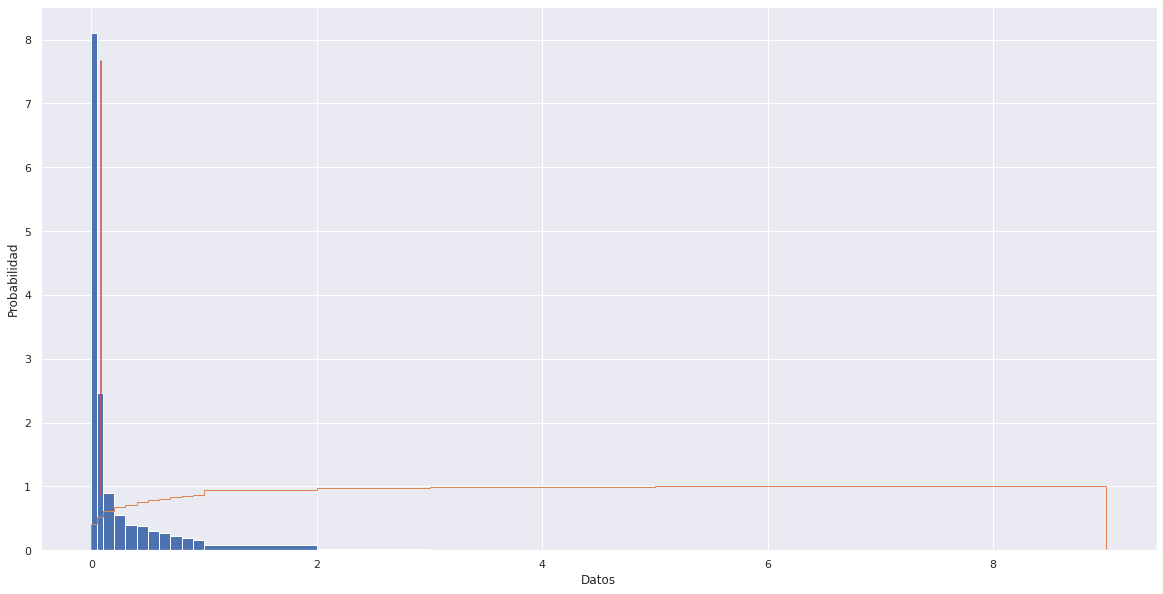

In [27]:
plt.hist(nueva_data, bins=[0,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1, 2, 3, 4,5,6,7,8,9], density=True)
plt.hist(nueva_data, bins=[0,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1, 2, 3, 4,5,6,7,8,9], density=True, cumulative=True, label='CDF', histtype='step')
plt.axvline(x=nd[-1], ymin=0.1, ymax=0.9, color = "r")   
plt.xlabel("Datos")
plt.ylabel("Probabilidad")
plt.show() 

# De acuerdo al umbral obtener pares de palabras del texto y la hipótesis mayores a este (1)

In [28]:
muestreos

['0.05', '0.1', '0.15', '0.2', '0.5', '0.8', '1']

In [29]:
a=glob.glob(carpeta+'p*_'+muestreos[1]+'_*.pickle')
a

['data/Only_training_hipotesis_salida/pTEST_new_0.1_5.csv.pickle',
 'data/Only_training_hipotesis_salida/pTEST_new_0.1_19.csv.pickle',
 'data/Only_training_hipotesis_salida/pTEST_new_0.1_0.csv.pickle',
 'data/Only_training_hipotesis_salida/pTEST_new_0.1_10.csv.pickle',
 'data/Only_training_hipotesis_salida/pTEST_new_0.1_3.csv.pickle',
 'data/Only_training_hipotesis_salida/pTEST_new_0.1_11.csv.pickle',
 'data/Only_training_hipotesis_salida/pTEST_new_0.1_6.csv.pickle',
 'data/Only_training_hipotesis_salida/pTEST_new_0.1_7.csv.pickle',
 'data/Only_training_hipotesis_salida/pTEST_new_0.1_8.csv.pickle',
 'data/Only_training_hipotesis_salida/pTEST_new_0.1_9.csv.pickle',
 'data/Only_training_hipotesis_salida/pTEST_new_0.1_4.csv.pickle',
 'data/Only_training_hipotesis_salida/pTEST_new_0.1_15.csv.pickle',
 'data/Only_training_hipotesis_salida/pTEST_new_0.1_2.csv.pickle',
 'data/Only_training_hipotesis_salida/pTEST_new_0.1_13.csv.pickle',
 'data/Only_training_hipotesis_salida/pTEST_new_0.1_16.cs

In [30]:
dfm=pd.read_pickle(a[0])
dfm

,Main index,Text,Hipotesis,R_Text,R_Hip,M_Align,Prediction,Gold_label,Paraphrase,Idx,predicted_label,gold_label,ma_umbral,target_prediction
0,0,"[NULL{null,PROPN}, a{a,DET}, man{man,NOUN}, st...","[NULL{null,ADJ}, there{there,ADV}, is{be,VERB}...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.18873432, 0.016168319, 0.0140...","[0.6086774, 0.17196694, 0.21935573]","[0.0, 0.0, 1.0]",0,4181,entailment,contradiction,...,contradiction_entailment
1,1,"[NULL{null,PROPN}, a{a,DET}, man{man,NOUN}, lo...","[NULL{null,PROPN}, a{a,DET}, man{man,NOUN}, lo...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.014024382, 0.1707767, 0.12397...","[0.94949037, 0.042576626, 0.007932974]","[1.0, 0.0, 0.0]",0,3307,entailment,entailment,NOUN...,entailment_entailment
2,2,"[NULL{null,ADJ}, two{two,NUM}, men{man,NOUN}, ...","[NULL{null,PROPN}, the{the,DET}, ref{ref,NOUN}...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.004343943, 0.18545862, 0.1593...","[0.5980896, 0.28487897, 0.117031455]","[1.0, 0.0, 0.0]",0,5452,entailment,entailment,...,entailment_entailment
3,3,"[NULL{null,PROPN}, a{a,DET}, biker{biker,NOUN}...","[NULL{null,PROPN}, a{a,DET}, biker{biker,NOUN}...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.014024382, 0.22655281, 0.0161...","[0.394785, 0.6011412, 0.004073715]","[1.0, 0.0, 0.0]",0,2192,neutral,entailment,...,entailment_neutral
4,4,"[NULL{null,ADJ}, phone{phone,NOUN}, to{to,ADP}...","[NULL{null,ADJ}, phone{phone,NOUN}, to{to,ADP}...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.34708259, 0.052065227, 0.1234...","[0.4308893, 0.499801, 0.06930965]","[0.0, 1.0, 0.0]",0,8039,neutral,neutral,...,neutral_neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1357,1357,"[NULL{null,PROPN}, a{a,DET}, man{man,NOUN}, wi...","[NULL{null,PROPN}, the{the,DET}, family{family...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.004343943, 0.1738117, 0.13922...","[0.0057639335, 0.31997496, 0.6742611]","[0.0, 0.0, 1.0]",1,9735,contradiction,contradiction,...,contradiction_contradiction
1358,1358,"[NULL{null,PROPN}, a{a,DET}, man{man,NOUN}, an...","[NULL{null,PROPN}, the{the,DET}, two{two,NUM},...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.004343943, 0.08687423, 0.1707...","[0.87726325, 0.049941257, 0.0727954]","[1.0, 0.0, 0.0]",1,9747,entailment,entailment,NOUN VERB ADV AD...,entailment_entailment
1359,1359,"[NULL{null,ADJ}, two{two,NUM}, men{man,NOUN}, ...","[NULL{null,ADJ}, two{two,NUM}, karate{karate,A...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.08687423, 0.14388175, 0.21513...","[0.06598082, 0.90685165, 0.027167527]","[0.0, 1.0, 0.0]",1,9768,neutral,neutral,...,neutral_neutral
1360,1360,"[NULL{null,PROPN}, a{a,DET}, woman{woman,NOUN}...","[NULL{null,ADJ}, these{these,DET}, two{two,NUM...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.04710908, 0.08687423, 0.01119...","[0.8255515, 0.15067035, 0.023778128]","[1.0, 0.0, 0.0]",1,9790,entailment,entailment,NOUN VERB ADV ADJ NOUN ...,entailment_entailment


In [31]:
dfm['ma_umbral'][0]

,NOUN,VERB,ADV,ADJ
NOUN,",0.9968114,3.2146893,1.0532783,0.9002782,0.258...",",0.6010328,0.96222395,0.44534186,0.28689367",",0.48312917,0.38580212,2.3309438,0.5725596,3.5...",
VERB,",0.64476573,0.73577017,0.32844433,0.23159781,0...",",1.3064096,0.42231616,1.272974",",0.65696645,0.5912931,0.20896304,0.6522244,0.5...",
ADV,,,,
ADJ,",0.8046122,0.25203508,1.548549",,",0.3635555",


In [32]:
dfm

,Main index,Text,Hipotesis,R_Text,R_Hip,M_Align,Prediction,Gold_label,Paraphrase,Idx,predicted_label,gold_label,ma_umbral,target_prediction
0,0,"[NULL{null,PROPN}, a{a,DET}, man{man,NOUN}, st...","[NULL{null,ADJ}, there{there,ADV}, is{be,VERB}...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.18873432, 0.016168319, 0.0140...","[0.6086774, 0.17196694, 0.21935573]","[0.0, 0.0, 1.0]",0,4181,entailment,contradiction,...,contradiction_entailment
1,1,"[NULL{null,PROPN}, a{a,DET}, man{man,NOUN}, lo...","[NULL{null,PROPN}, a{a,DET}, man{man,NOUN}, lo...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.014024382, 0.1707767, 0.12397...","[0.94949037, 0.042576626, 0.007932974]","[1.0, 0.0, 0.0]",0,3307,entailment,entailment,NOUN...,entailment_entailment
2,2,"[NULL{null,ADJ}, two{two,NUM}, men{man,NOUN}, ...","[NULL{null,PROPN}, the{the,DET}, ref{ref,NOUN}...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.004343943, 0.18545862, 0.1593...","[0.5980896, 0.28487897, 0.117031455]","[1.0, 0.0, 0.0]",0,5452,entailment,entailment,...,entailment_entailment
3,3,"[NULL{null,PROPN}, a{a,DET}, biker{biker,NOUN}...","[NULL{null,PROPN}, a{a,DET}, biker{biker,NOUN}...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.014024382, 0.22655281, 0.0161...","[0.394785, 0.6011412, 0.004073715]","[1.0, 0.0, 0.0]",0,2192,neutral,entailment,...,entailment_neutral
4,4,"[NULL{null,ADJ}, phone{phone,NOUN}, to{to,ADP}...","[NULL{null,ADJ}, phone{phone,NOUN}, to{to,ADP}...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.34708259, 0.052065227, 0.1234...","[0.4308893, 0.499801, 0.06930965]","[0.0, 1.0, 0.0]",0,8039,neutral,neutral,...,neutral_neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1357,1357,"[NULL{null,PROPN}, a{a,DET}, man{man,NOUN}, wi...","[NULL{null,PROPN}, the{the,DET}, family{family...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.004343943, 0.1738117, 0.13922...","[0.0057639335, 0.31997496, 0.6742611]","[0.0, 0.0, 1.0]",1,9735,contradiction,contradiction,...,contradiction_contradiction
1358,1358,"[NULL{null,PROPN}, a{a,DET}, man{man,NOUN}, an...","[NULL{null,PROPN}, the{the,DET}, two{two,NUM},...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.004343943, 0.08687423, 0.1707...","[0.87726325, 0.049941257, 0.0727954]","[1.0, 0.0, 0.0]",1,9747,entailment,entailment,NOUN VERB ADV AD...,entailment_entailment
1359,1359,"[NULL{null,ADJ}, two{two,NUM}, men{man,NOUN}, ...","[NULL{null,ADJ}, two{two,NUM}, karate{karate,A...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.08687423, 0.14388175, 0.21513...","[0.06598082, 0.90685165, 0.027167527]","[0.0, 1.0, 0.0]",1,9768,neutral,neutral,...,neutral_neutral
1360,1360,"[NULL{null,PROPN}, a{a,DET}, woman{woman,NOUN}...","[NULL{null,ADJ}, these{these,DET}, two{two,NUM...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.04710908, 0.08687423, 0.01119...","[0.8255515, 0.15067035, 0.023778128]","[1.0, 0.0, 0.0]",1,9790,entailment,entailment,NOUN VERB ADV ADJ NOUN ...,entailment_entailment


In [33]:
tp=dfm['target_prediction'].unique()

In [34]:
len(tp)

9

In [35]:
labels

['entailment_entailment',
 'entailment_neutral',
 'entailment_contradiction',
 'neutral_entailment',
 'neutral_neutral',
 'neutral_contradiction',
 'contradiction_entailment',
 'contradiction_neutral',
 'contradiction_contradiction']

In [36]:
# new_data = {'Docs' : [], 'grupo': [], 'datos': [],'etiqueta':[],'paraphrase':[]}
# conteo=0
# for gp in muestreos:
#     a=glob.glob(carpeta+'p*_'+gp+'_*.pickle')
#     for e in a:
#         print(e)
#         temp=pd.read_pickle(e)
#         for f in labels:
#             #obtener la matriz de alineamiento
#             for pf in [0,1]:
#                 #vamos a filtrar por target prediction
#                 data={}
#                 temp2=temp[(temp['target_prediction']==f) & (temp['Paraphrase']==pf) ]
#                 for index2,strings2 in temp2.iterrows():
#                     dt=strings2['ma_umbral']
#                     columnas3=dt.columns
#                     for index3,strings3 in dt.iterrows():
#                         for c in columnas3:
#                             num=strings3[c].split(',')
#                             if(len(num)>1):
#                                 if(index3+"_"+c in data):
#                                     g=data[index3+"_"+c]
#                                     #print(g,index3+"_"+c)
#                                     data[index3+"_"+c]= g+num[1:]
#                                     #print(g.extend(num[1:]),data[index3+"_"+c],num[1:])
#                                 elif(c+"_"+index3 in data):
#                                     g=data[c+"_"+index3]
#                                     #print(g,index3+"_"+c)
#                                     data[c+"_"+index3]= g+num[1:]
#                                 else:
#                                     #print("entra:",index3+"_"+c,num[1:])
#                                     data[index3+"_"+c]=num[1:]
#                 new_data['Docs'].append(e)
#                 new_data['grupo'].append(gp)
#                 new_data['datos'].append(data)
#                 new_data['etiqueta'].append(f)
#                 new_data['paraphrase'].append(pf)
# data_boxplot=pd.DataFrame(new_data)
# data_boxplot.to_pickle(carpeta+"align/union_vbosplot.pickle")

In [37]:
# Se obtuvieron dos dataframe finales 
# 1) data_POS_ALIGN_T_H.pickle que toma en cuenta la dirección de la alineación de un archivo de un muestreo, por target_prediction 
# es decir NOUN_ADJ es NOUN (Texto) y ADJ (hipótesis) que es diferente de ADJ_NOUN: ADJ (Texto) y NOUN (hipótesis)
# 2) data_POS_ALIGN.pickle no toma en cuenta la dirección de la alineación si no solo el tipo de palabras que se vinculan
# no importa en donde este Texto o Hipótesis

In [38]:
data_boxplot=pd.read_pickle(carpeta+"align/union_vbosplot.pickle")

In [39]:
data_boxplot

,Docs,grupo,datos,etiqueta,paraphrase
0,data/Only_training_hipotesis_salida/pTEST_new_...,0.05,"{'NOUN_NOUN': ['3.2146893', '2.4020436', '2.89...",entailment_entailment,0
1,data/Only_training_hipotesis_salida/pTEST_new_...,0.05,"{'NOUN_NOUN': ['0.5406507', '2.0469', '0.91561...",entailment_entailment,1
2,data/Only_training_hipotesis_salida/pTEST_new_...,0.05,"{'NOUN_NOUN': ['4.1247168', '0.79325783', '3.8...",entailment_neutral,0
3,data/Only_training_hipotesis_salida/pTEST_new_...,0.05,"{'NOUN_NOUN': ['1.0171505', '3.0271163', '2.63...",entailment_neutral,1
4,data/Only_training_hipotesis_salida/pTEST_new_...,0.05,{},entailment_contradiction,0
...,...,...,...,...,...
2173,data/Only_training_hipotesis_salida/pTEST_new_...,1,"{'NOUN_NOUN': ['1.9776106', '0.84690475', '0.4...",contradiction_entailment,1
2174,data/Only_training_hipotesis_salida/pTEST_new_...,1,"{'NOUN_NOUN': ['4.48619', '1.8869704', '1.8163...",contradiction_neutral,0
2175,data/Only_training_hipotesis_salida/pTEST_new_...,1,"{'ADJ_NOUN': ['0.646368', '1.1002231', '1.4092...",contradiction_neutral,1
2176,data/Only_training_hipotesis_salida/pTEST_new_...,1,"{'NOUN_NOUN': ['3.8512385', '0.6572952', '0.74...",contradiction_contradiction,0


In [40]:
data_boxplot=data_boxplot[data_boxplot["grupo"]=="1"]
data_boxplot

,Docs,grupo,datos,etiqueta,paraphrase
2160,data/Only_training_hipotesis_salida/pTEST_new_...,1,"{'NOUN_NOUN': ['5.46013', '2.5968564', '2.5991...",entailment_entailment,0
2161,data/Only_training_hipotesis_salida/pTEST_new_...,1,"{'NOUN_NOUN': ['0.7591228', '4.7579765', '0.59...",entailment_entailment,1
2162,data/Only_training_hipotesis_salida/pTEST_new_...,1,"{'NOUN_NOUN': ['4.7579765', '1.8833122', '2.18...",entailment_neutral,0
2163,data/Only_training_hipotesis_salida/pTEST_new_...,1,"{'NOUN_NOUN': ['1.8943223', '0.48259407', '0.5...",entailment_neutral,1
2164,data/Only_training_hipotesis_salida/pTEST_new_...,1,"{'NOUN_NOUN': ['4.5691986', '0.8666864', '0.67...",entailment_contradiction,0
2165,data/Only_training_hipotesis_salida/pTEST_new_...,1,"{'NOUN_NOUN': ['6.8387895', '0.878015', '1.881...",entailment_contradiction,1
2166,data/Only_training_hipotesis_salida/pTEST_new_...,1,"{'NOUN_NOUN': ['2.4345796', '1.8628229', '0.95...",neutral_entailment,0
2167,data/Only_training_hipotesis_salida/pTEST_new_...,1,"{'NOUN_NOUN': ['0.75073254', '2.241436', '2.20...",neutral_entailment,1
2168,data/Only_training_hipotesis_salida/pTEST_new_...,1,"{'NOUN_NOUN': ['3.2146893', '0.62287676', '1.1...",neutral_neutral,0
2169,data/Only_training_hipotesis_salida/pTEST_new_...,1,"{'NOUN_ADJ': ['1.3652465', '0.8041457', '1.210...",neutral_neutral,1


In [41]:
lista_tp_words=["NOUN_NOUN","NOUN_VERB","NOUN_ADJ","NOUN_ADV","VERB_NOUN","VERB_VERB","VERB_ADJ","VERB_ADV",
                "ADJ_NOUN","ADJ_VERB","ADJ_ADJ","ADJ_ADV","ADV_NOUN","ADV_VERB","ADV_ADJ","ADV_ADV"]
etiquetas_tp_words=["NOUN_NOUN","NOUN_NOUN_p","NOUN_VERB","NOUN_VERB_p","NOUN_ADJ","NOUN_ADJ_p","NOUN_ADV","NOUN_ADV_p","VERB_NOUN","VERB_NOUN_p",
                    "VERB_VERB","VERB_VERB_p","VERB_ADJ","VERB_ADJ_p","VERB_ADV","VERB_ADV_p","ADJ_NOUN","ADJ_NOUN_p","ADJ_VERB","ADJ_VERB_p",
                    "ADJ_ADJ","ADJ_ADJ_p","ADJ_ADV","ADJ_ADV_p","ADV_NOUN","ADV_NOUN_p","ADV_VERB","ADV_VERB_p","ADV_ADJ","ADV_ADJ_p","ADV_ADV","ADV_ADV_p"]

In [42]:
dict0 = data_boxplot.at[2160,"datos"]
dict1 = data_boxplot.at[2161,"datos"]

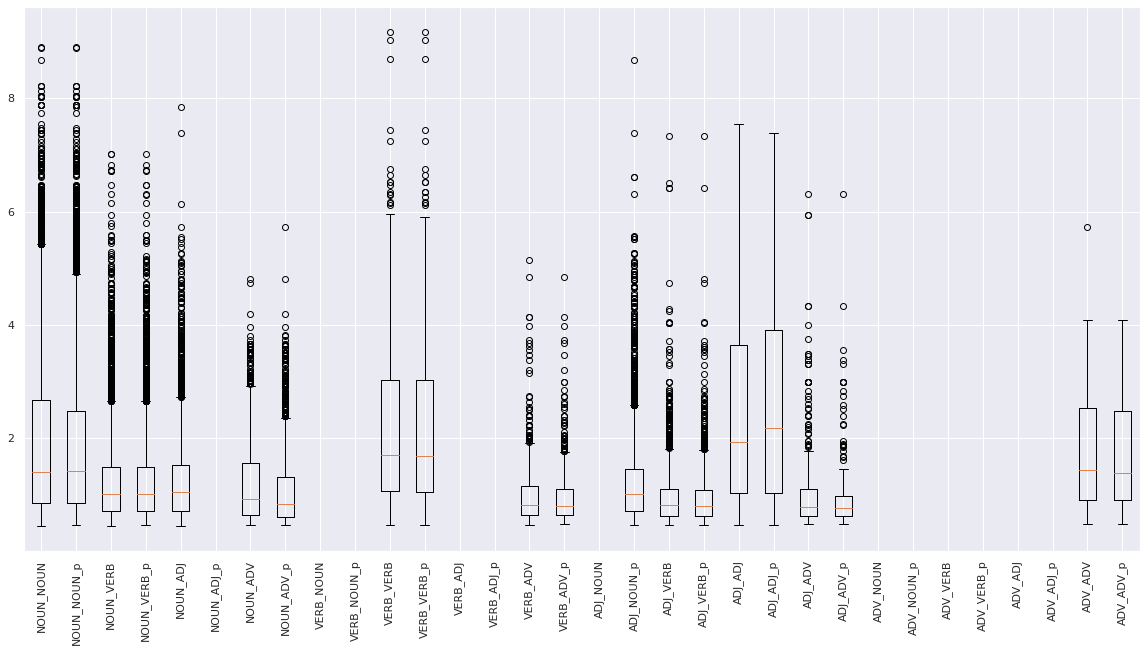

In [43]:
data_final0=[]
# or backwards compatable
data0=[]
for tw in lista_tp_words:
    if tw in dict0.keys():
        data0.append(list(dict0[tw]))
    else:
        data0.append(list())
    if tw in dict1.keys():
        data0.append(list(dict1[tw]))
    else:
        data0.append(list())
for i in range(len(data0)):
    floats = [float(x) for x in data0[i]]
    data_final0.append(floats)

plt.figure(figsize=(20,10))
plt.boxplot(data_final0)
plt.xticks(rotation = 90)
plt.xticks(range(1, len(etiquetas_tp_words) + 1), etiquetas_tp_words)
plt.show()

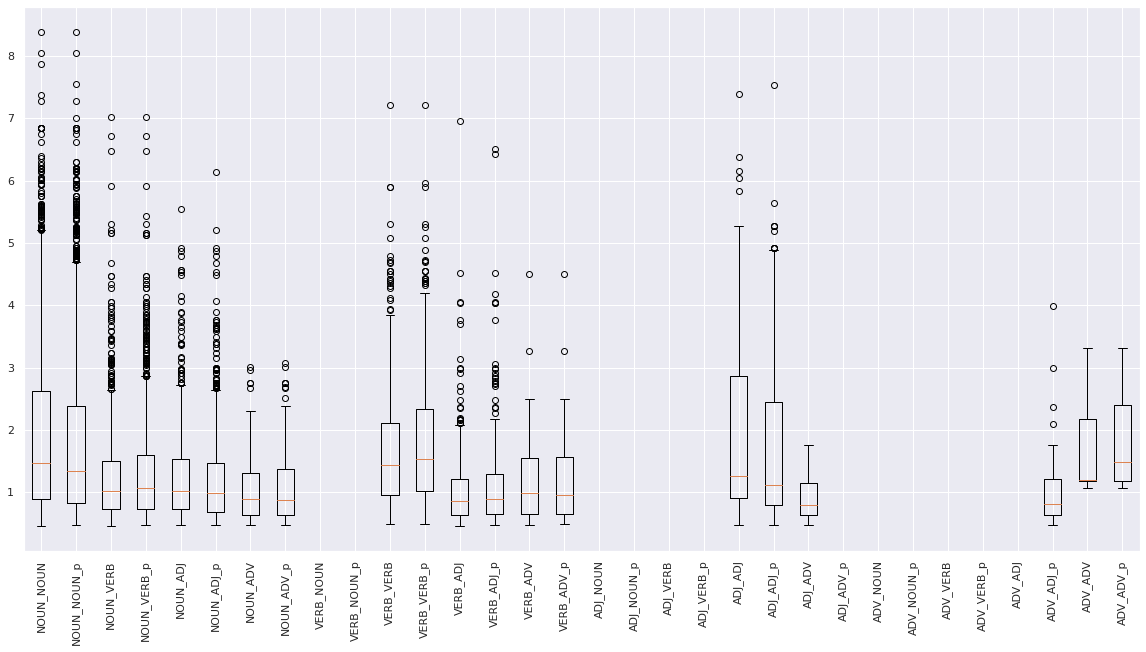

In [44]:
dict0 = data_boxplot.at[2162,"datos"]
dict1 = data_boxplot.at[2163,"datos"]
data_final0=[]
# or backwards compatable
data0=[]
for tw in lista_tp_words:
    if tw in dict0.keys():
        data0.append(list(dict0[tw]))
    else:
        data0.append(list())
    if tw in dict1.keys():
        data0.append(list(dict1[tw]))
    else:
        data0.append(list())
for i in range(len(data0)):
    floats = [float(x) for x in data0[i]]
    data_final0.append(floats)

plt.figure(figsize=(20,10))
plt.boxplot(data_final0)
plt.xticks(rotation = 90)
plt.xticks(range(1, len(etiquetas_tp_words) + 1), etiquetas_tp_words)
plt.show()

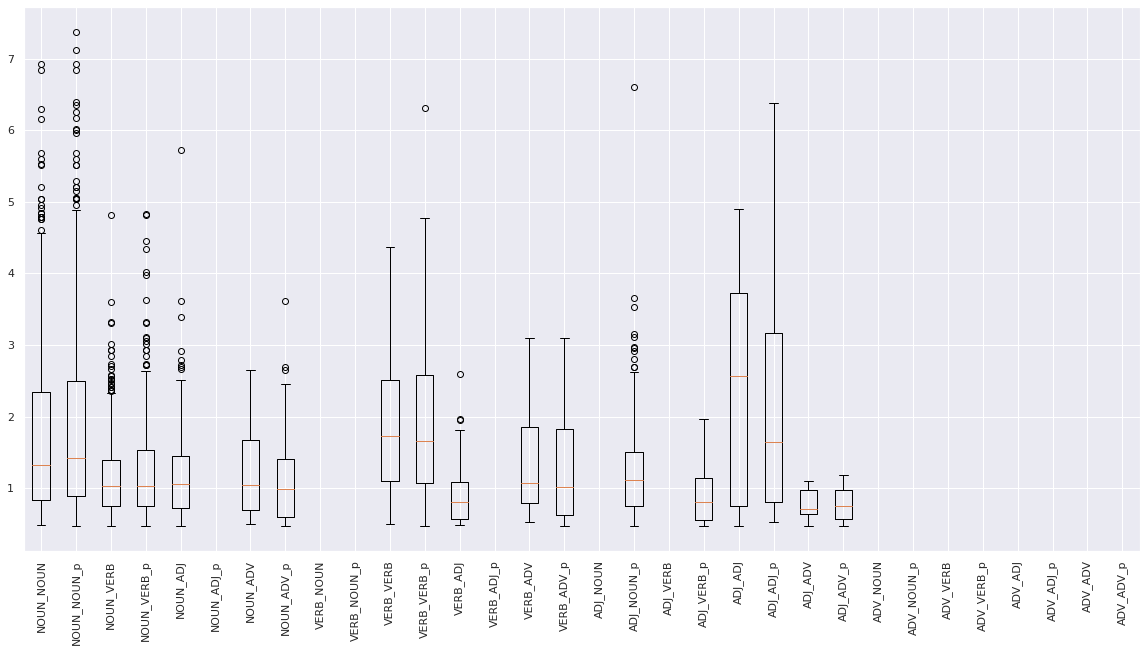

In [45]:
dict0 = data_boxplot.at[2164,"datos"]
dict1 = data_boxplot.at[2165,"datos"]
data_final0=[]
# or backwards compatable
data0=[]
for tw in lista_tp_words:
    if tw in dict0.keys():
        data0.append(list(dict0[tw]))
    else:
        data0.append(list())
    if tw in dict1.keys():
        data0.append(list(dict1[tw]))
    else:
        data0.append(list())
for i in range(len(data0)):
    floats = [float(x) for x in data0[i]]
    data_final0.append(floats)

plt.figure(figsize=(20,10))
plt.boxplot(data_final0)
plt.xticks(rotation = 90)
plt.xticks(range(1, len(etiquetas_tp_words) + 1), etiquetas_tp_words)
plt.show()

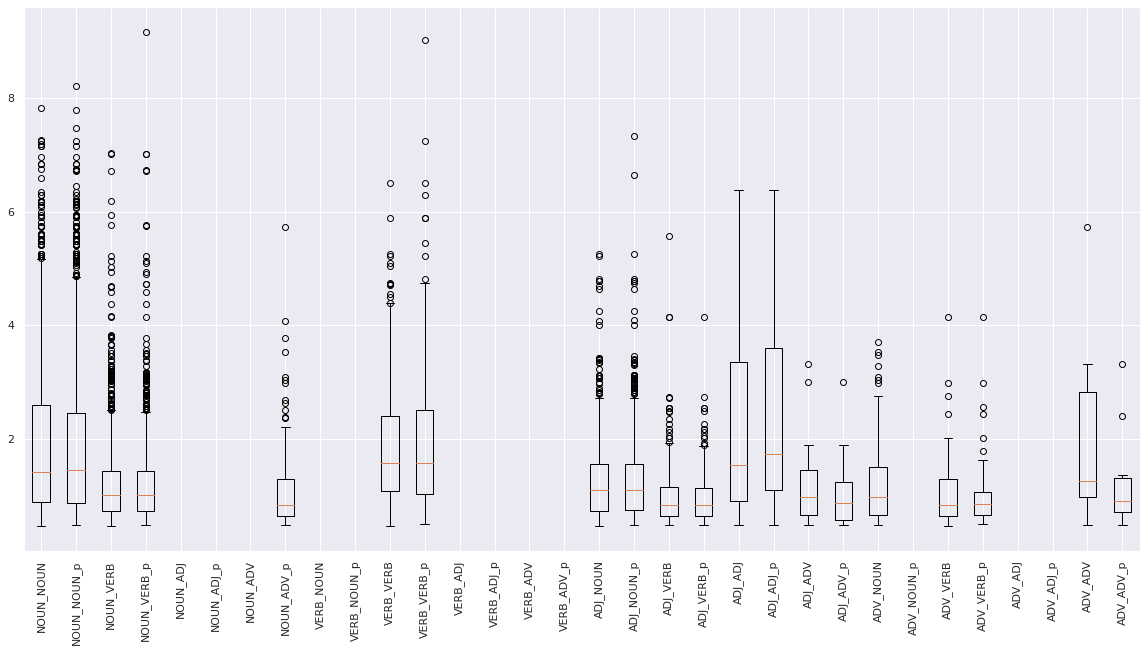

In [46]:
dict0 = data_boxplot.at[2166,"datos"]
dict1 = data_boxplot.at[2167,"datos"]
data_final0=[]
# or backwards compatable
data0=[]
for tw in lista_tp_words:
    if tw in dict0.keys():
        data0.append(list(dict0[tw]))
    else:
        data0.append(list())
    if tw in dict1.keys():
        data0.append(list(dict1[tw]))
    else:
        data0.append(list())
for i in range(len(data0)):
    floats = [float(x) for x in data0[i]]
    data_final0.append(floats)

plt.figure(figsize=(20,10))
plt.boxplot(data_final0)
plt.xticks(rotation = 90)
plt.xticks(range(1, len(etiquetas_tp_words) + 1), etiquetas_tp_words)
plt.show()

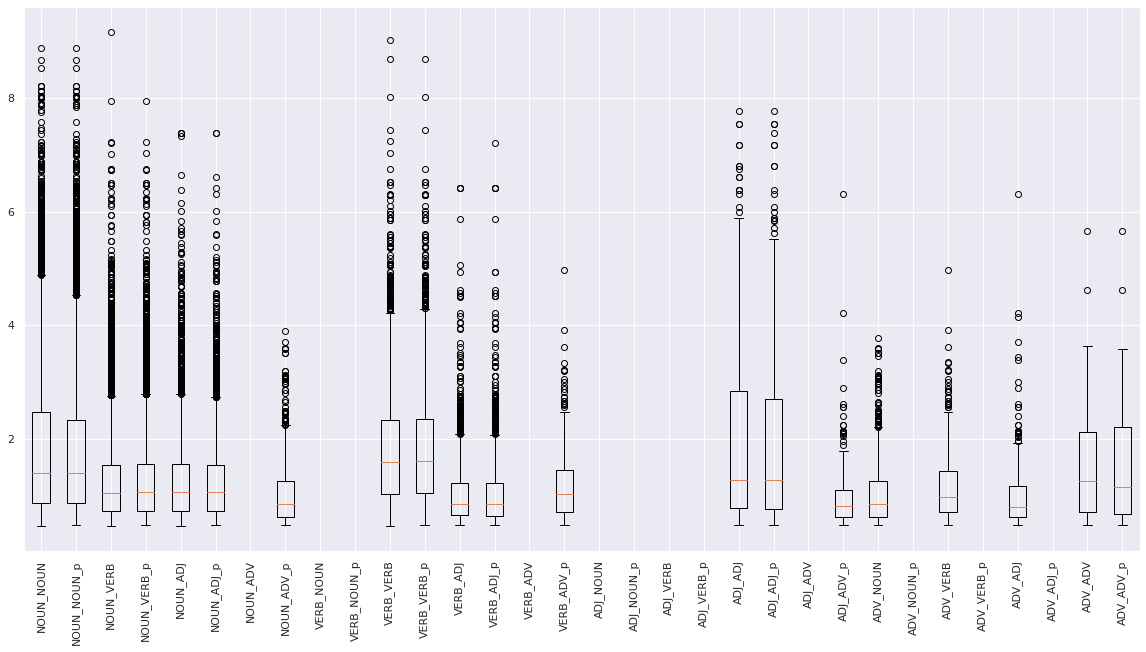

In [47]:
dict0 = data_boxplot.at[2168,"datos"]
dict1 = data_boxplot.at[2169,"datos"]
data_final0=[]
# or backwards compatable
data0=[]
for tw in lista_tp_words:
    if tw in dict0.keys():
        data0.append(list(dict0[tw]))
    else:
        data0.append(list())
    if tw in dict1.keys():
        data0.append(list(dict1[tw]))
    else:
        data0.append(list())
for i in range(len(data0)):
    floats = [float(x) for x in data0[i]]
    data_final0.append(floats)

plt.figure(figsize=(20,10))
plt.boxplot(data_final0)
plt.xticks(rotation = 90)
plt.xticks(range(1, len(etiquetas_tp_words) + 1), etiquetas_tp_words)
plt.show()

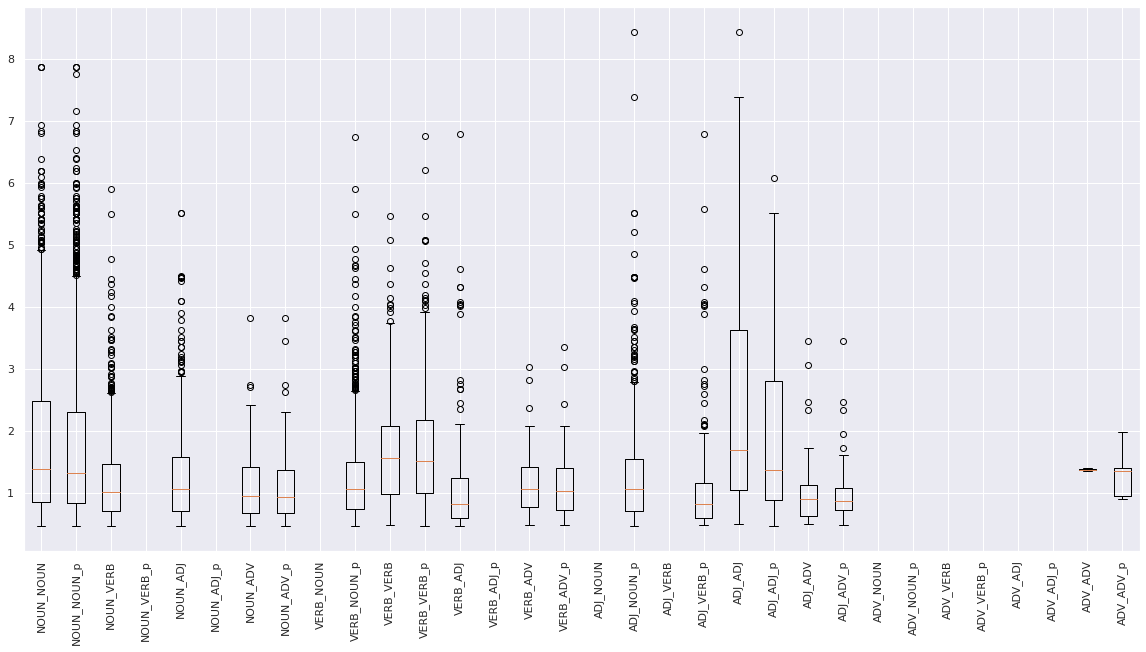

In [48]:
dict0 = data_boxplot.at[2170,"datos"]
dict1 = data_boxplot.at[2171,"datos"]
data_final0=[]
# or backwards compatable
data0=[]
for tw in lista_tp_words:
    if tw in dict0.keys():
        data0.append(list(dict0[tw]))
    else:
        data0.append(list())
    if tw in dict1.keys():
        data0.append(list(dict1[tw]))
    else:
        data0.append(list())
for i in range(len(data0)):
    floats = [float(x) for x in data0[i]]
    data_final0.append(floats)

plt.figure(figsize=(20,10))
plt.boxplot(data_final0)
plt.xticks(rotation = 90)
plt.xticks(range(1, len(etiquetas_tp_words) + 1), etiquetas_tp_words)
plt.show()

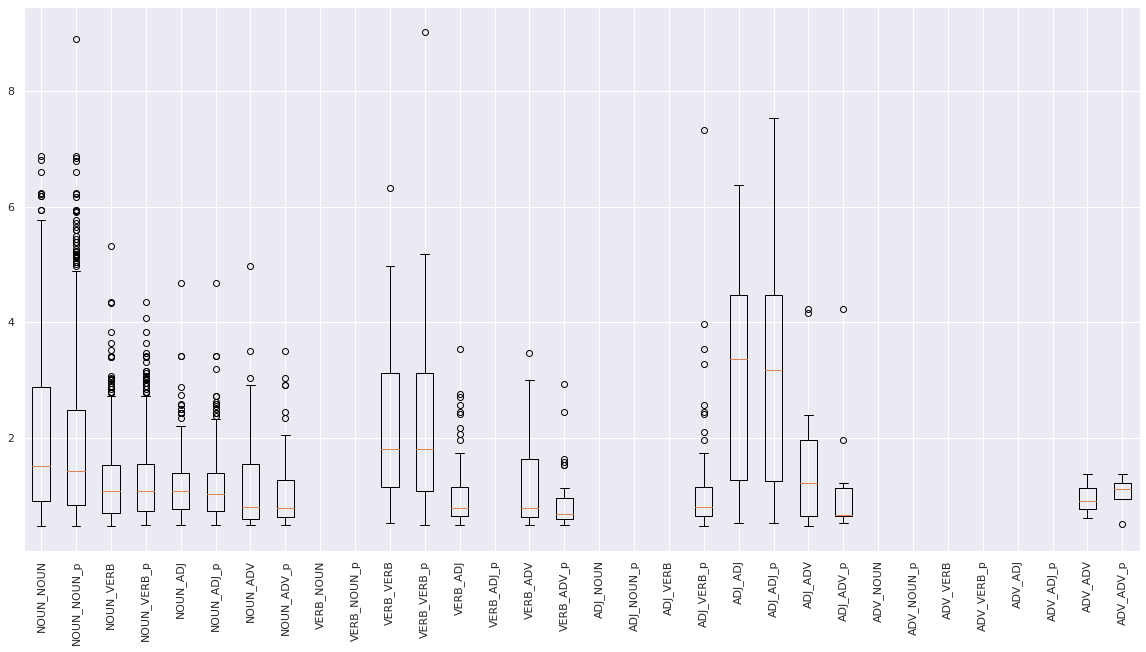

In [49]:
dict0 = data_boxplot.at[2172,"datos"]
dict1 = data_boxplot.at[2173,"datos"]
data_final0=[]
# or backwards compatable
data0=[]
for tw in lista_tp_words:
    if tw in dict0.keys():
        data0.append(list(dict0[tw]))
    else:
        data0.append(list())
    if tw in dict1.keys():
        data0.append(list(dict1[tw]))
    else:
        data0.append(list())
for i in range(len(data0)):
    floats = [float(x) for x in data0[i]]
    data_final0.append(floats)

plt.figure(figsize=(20,10))
plt.boxplot(data_final0)
plt.xticks(rotation = 90)
plt.xticks(range(1, len(etiquetas_tp_words) + 1), etiquetas_tp_words)
plt.show()

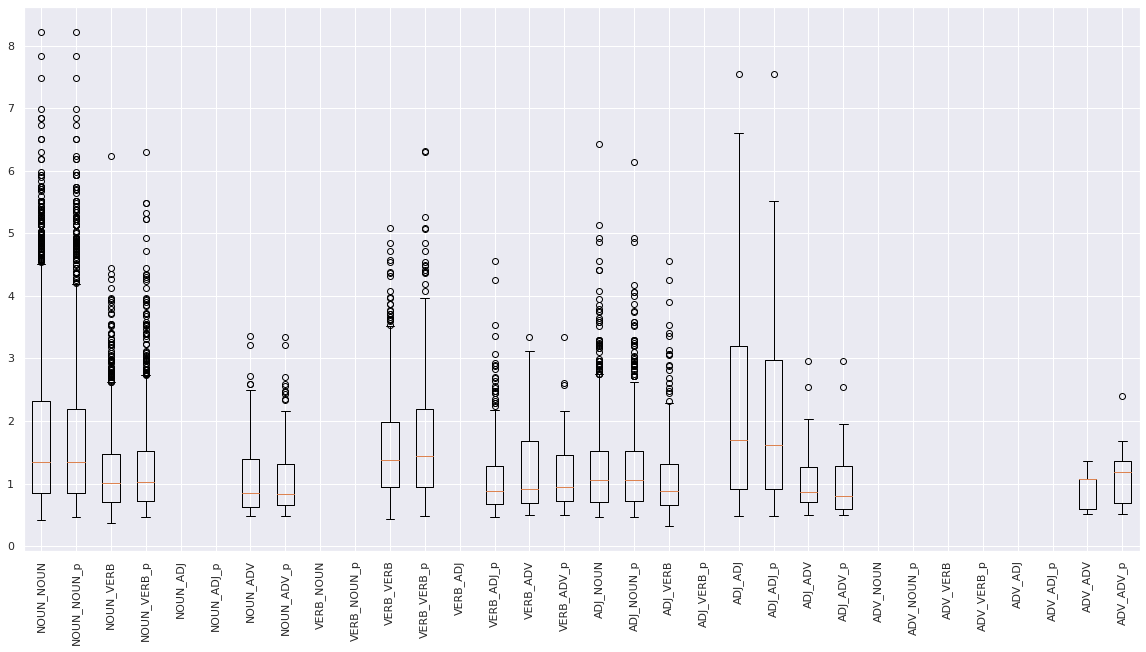

In [50]:
dict0 = data_boxplot.at[2174,"datos"]
dict1 = data_boxplot.at[2175,"datos"]
data_final0=[]
# or backwards compatable
data0=[]
for tw in lista_tp_words:
    if tw in dict0.keys():
        data0.append(list(dict0[tw]))
    else:
        data0.append(list())
    if tw in dict1.keys():
        data0.append(list(dict1[tw]))
    else:
        data0.append(list())
for i in range(len(data0)):
    floats = [float(x) for x in data0[i]]
    data_final0.append(floats)

plt.figure(figsize=(20,10))
plt.boxplot(data_final0)
plt.xticks(rotation = 90)
plt.xticks(range(1, len(etiquetas_tp_words) + 1), etiquetas_tp_words)
plt.show()

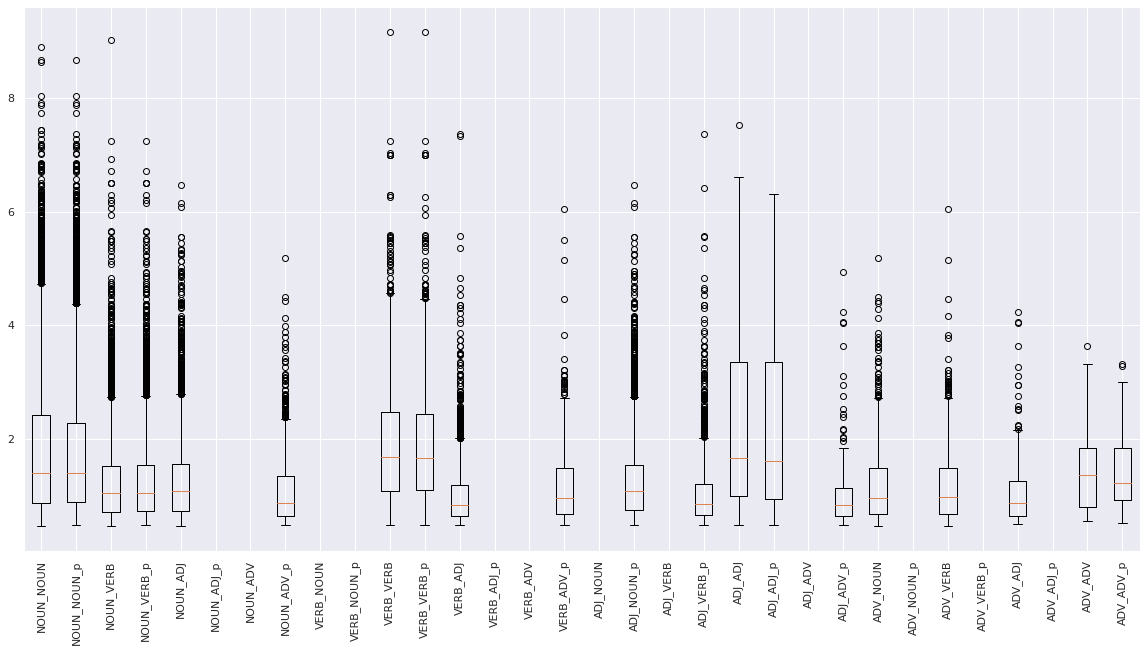

In [51]:
dict0 = data_boxplot.at[2176,"datos"]
dict1 = data_boxplot.at[2177,"datos"]
data_final0=[]
# or backwards compatable
data0=[]
for tw in lista_tp_words:
    if tw in dict0.keys():
        data0.append(list(dict0[tw]))
    else:
        data0.append(list())
    if tw in dict1.keys():
        data0.append(list(dict1[tw]))
    else:
        data0.append(list())
for i in range(len(data0)):
    floats = [float(x) for x in data0[i]]
    data_final0.append(floats)

plt.figure(figsize=(20,10))
plt.boxplot(data_final0)
plt.xticks(rotation = 90)
plt.xticks(range(1, len(etiquetas_tp_words) + 1), etiquetas_tp_words)
plt.show()

# Procesar los dataframe de forma global por muestreo y compararlos con target_prediction de acuerdo a los tipos de palabras que se alinearon

In [52]:
df_global=pd.read_pickle(carpeta+"align/union_vbosplot.pickle")

In [53]:
from itertools import chain
from collections import defaultdict

In [54]:
# new_data = {'grupo': [], 'datos': [],'etiqueta':[],'paraphrase':[]}
# conteo=0
# temp=df_global.copy()
# for gp in muestreos:
#     for f in tp:
#         #obtener la matriz de alineamiento
#         for pf in [0,1]:
#             temp2=temp[(temp['etiqueta']==f) & (temp['paraphrase']==pf) & (temp['grupo']==gp)]
#             dt_b = defaultdict(list)
#             for index2,strings2 in temp2.iterrows():
#                 dt=strings2['datos']
#                 for k, v in chain(dt.items()):
#                     dt_b[k].append(v)
#             new_data['grupo'].append(gp)
#             new_data['datos'].append(dt_b)
#             new_data['etiqueta'].append(f)
#             new_data['paraphrase'].append(pf)
# data_boxplot_global=pd.DataFrame(new_data)
# data_boxplot_global.to_pickle(carpeta+"align/union_vbosplot_global.pickle")

In [55]:
data_boxplot_global=pd.read_pickle(carpeta+"align/union_vbosplot_global.pickle")

In [56]:
data_boxplot_global

,grupo,datos,etiqueta,paraphrase
0,0.05,"{'NOUN_NOUN': [['3.2146893', '0.8858202', '0.5...",contradiction_entailment,0
1,0.05,"{'NOUN_NOUN': [['4.792034', '0.6814693', '0.71...",contradiction_entailment,1
2,0.05,"{'NOUN_NOUN': [['3.2146893', '2.4020436', '2.8...",entailment_entailment,0
3,0.05,"{'NOUN_NOUN': [['0.5406507', '2.0469', '0.9156...",entailment_entailment,1
4,0.05,"{'NOUN_NOUN': [['4.1247168', '0.79325783', '3....",entailment_neutral,0
...,...,...,...,...
121,1,"{'ADJ_NOUN': [['0.646368', '1.1002231', '1.409...",contradiction_neutral,1
122,1,"{'NOUN_NOUN': [['2.4345796', '1.8628229', '0.9...",neutral_entailment,0
123,1,"{'NOUN_NOUN': [['0.75073254', '2.241436', '2.2...",neutral_entailment,1
124,1,"{'NOUN_NOUN': [['4.5691986', '0.8666864', '0.6...",entailment_contradiction,0


In [57]:
dict0_g=data_boxplot_global['datos'][0]
dict1_g=data_boxplot_global['datos'][1]
dict2_g=data_boxplot_global['datos'][2]
dict3_g=data_boxplot_global['datos'][3]
dict4_g=data_boxplot_global['datos'][4]
dict5_g=data_boxplot_global['datos'][5]

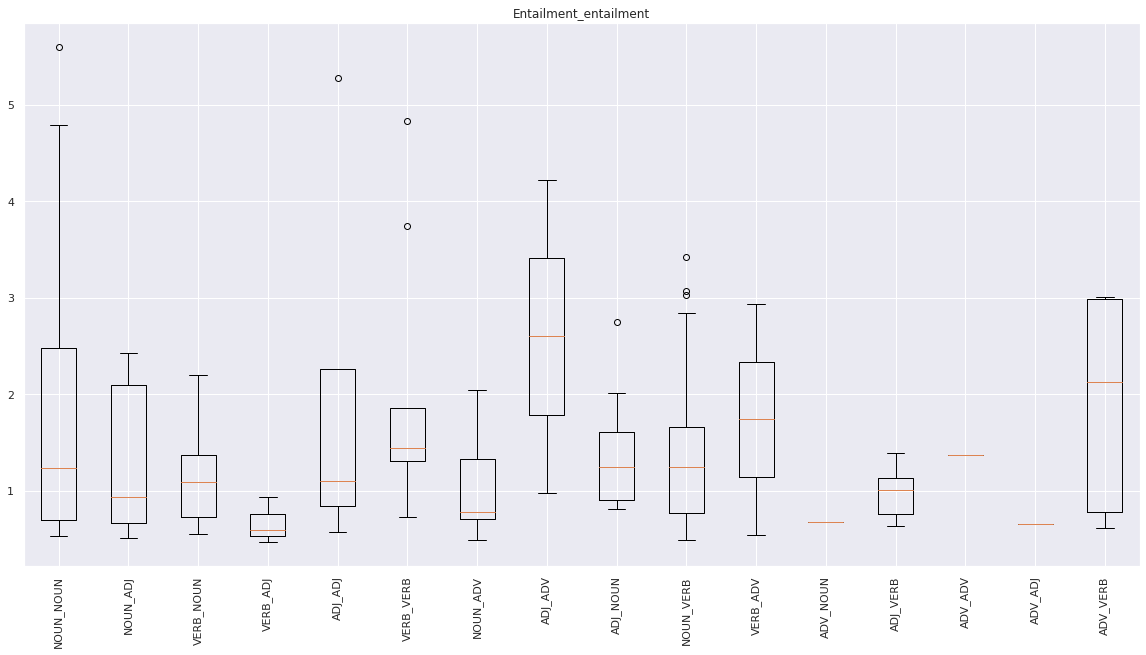

In [58]:
data_final0g=[]

# or backwards compatable    
labels0g, data0g = dict0_g.keys(), list(dict0_g.values())
for i in range(len(data0g)):
    for j in range(len(data0g[i])):
        floats = [float(x) for x in data0g[i][j]]
    data_final0g.append(floats)
plt.figure(figsize=(20,10))
plt.boxplot(data_final0g)
plt.xticks(rotation = 90)
plt.xticks(range(1, len(labels0g) + 1), labels0g)
plt.title("Entailment_entailment")
plt.show()

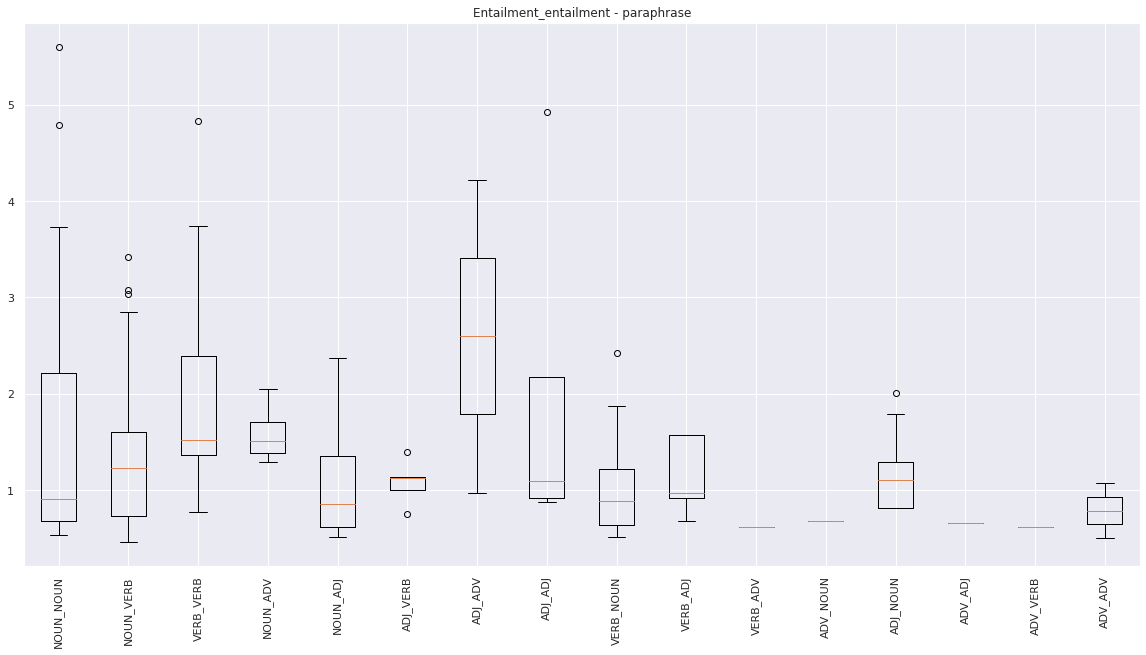

In [59]:
data_final1g=[]

# or backwards compatable    
labels1g, data1g = dict1_g.keys(), list(dict1_g.values())
for i in range(len(data1g)):
    for j in range(len(data1g[i])):
        floats = [float(x) for x in data1g[i][j]]
    data_final1g.append(floats)
plt.figure(figsize=(20,10))
plt.boxplot(data_final1g)
plt.xticks(rotation = 90)
plt.xticks(range(1, len(labels1g) + 1), labels1g)
plt.title("Entailment_entailment - paraphrase")
plt.show()

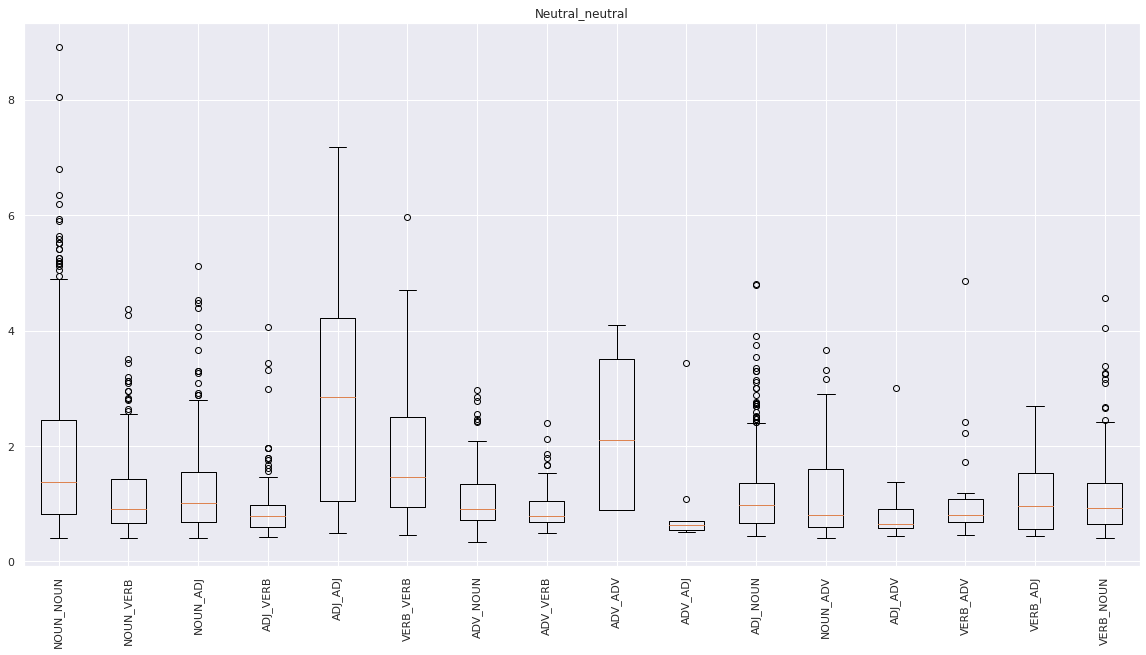

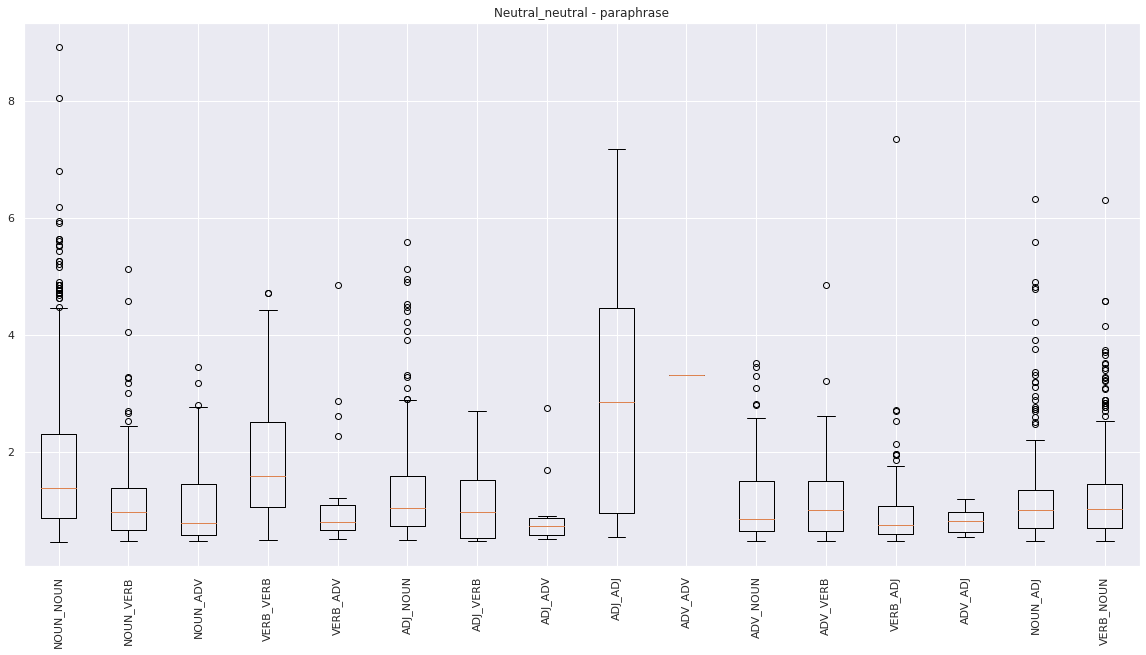

In [60]:
data_final2g=[]

# or backwards compatable    
labels2g, data2g = dict2_g.keys(), list(dict2_g.values())
for i in range(len(data2g)):
    for j in range(len(data2g[i])):
        floats = [float(x) for x in data2g[i][j]]
    data_final2g.append(floats)
plt.figure(figsize=(20,10))
plt.boxplot(data_final2g)
plt.xticks(rotation = 90)
plt.xticks(range(1, len(labels2g) + 1), labels2g)
plt.title("Neutral_neutral")
plt.show()

data_final3g=[]

# or backwards compatable    
labels3g, data3g = dict3_g.keys(), list(dict3_g.values())
for i in range(len(data3g)):
    for j in range(len(data3g[i])):
        floats = [float(x) for x in data3g[i][j]]
    data_final3g.append(floats)
plt.figure(figsize=(20,10))
plt.boxplot(data_final3g)
plt.xticks(rotation = 90)
plt.xticks(range(1, len(labels3g) + 1), labels3g)
plt.title("Neutral_neutral - paraphrase")
plt.show()

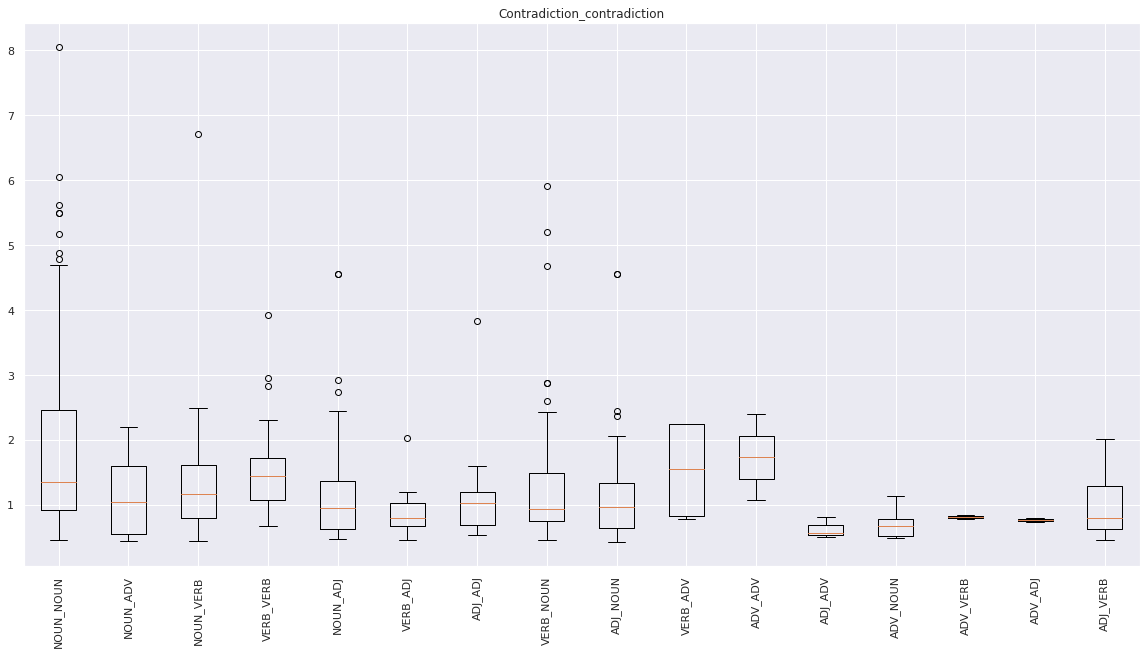

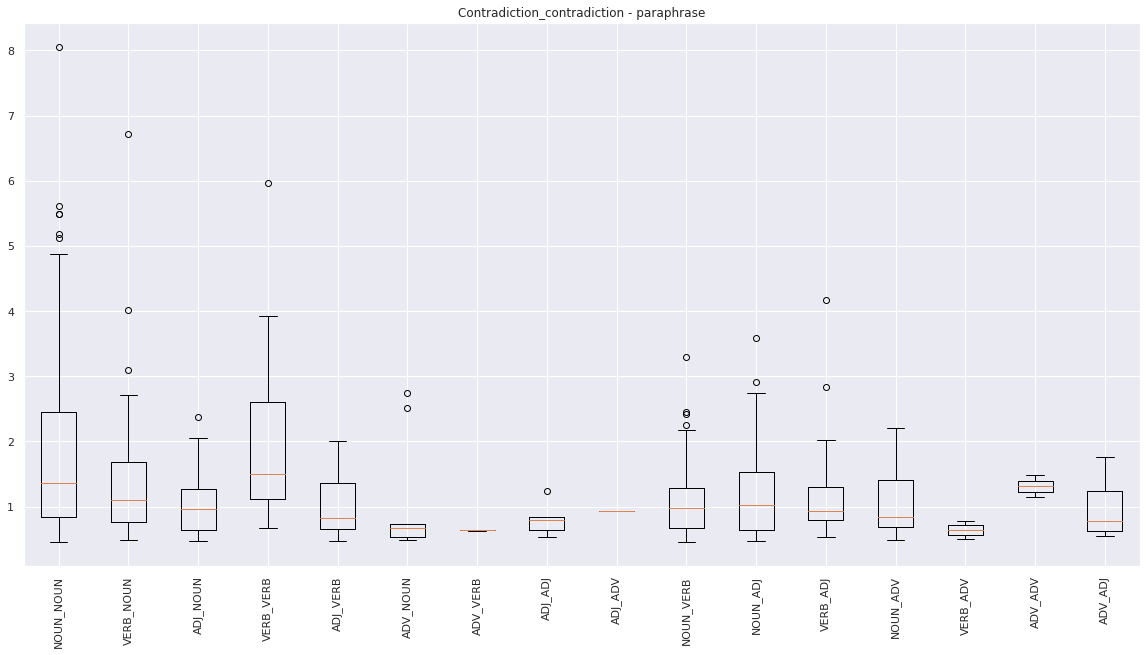

In [61]:
data_final4g=[]

# or backwards compatable    
labels4g, data4g = dict4_g.keys(), list(dict4_g.values())
for i in range(len(data4g)):
    for j in range(len(data4g[i])):
        floats = [float(x) for x in data4g[i][j]]
    data_final4g.append(floats)
plt.figure(figsize=(20,10))
plt.boxplot(data_final4g)
plt.xticks(rotation = 90)
plt.xticks(range(1, len(labels4g) + 1), labels4g)
plt.title("Contradiction_contradiction")
plt.show()

data_final5g=[]

# or backwards compatable    
labels5g, data5g = dict5_g.keys(), list(dict5_g.values())
for i in range(len(data5g)):
    for j in range(len(data5g[i])):
        floats = [float(x) for x in data5g[i][j]]
    data_final5g.append(floats)
plt.figure(figsize=(20,10))
plt.boxplot(data_final5g)
plt.xticks(rotation = 90)
plt.xticks(range(1, len(labels5g) + 1), labels5g)
plt.title("Contradiction_contradiction - paraphrase")
plt.show()

# vamos a crear los mapas de calor con conteos de los valores por tipo de palabras que tienen un alineamiento mayor al umbral

In [101]:
data_boxplot_global=pd.read_pickle(carpeta+"align/union_vbosplot_global.pickle")

In [102]:
data_boxplot_global=data_boxplot_global[data_boxplot_global["grupo"]=="1"]
data_boxplot_global

,grupo,datos,etiqueta,paraphrase
108,1,"{'NOUN_NOUN': [['0.8605532', '2.2840037', '2.0...",contradiction_entailment,0
109,1,"{'NOUN_NOUN': [['1.9776106', '0.84690475', '0....",contradiction_entailment,1
110,1,"{'NOUN_NOUN': [['5.46013', '2.5968564', '2.599...",entailment_entailment,0
111,1,"{'NOUN_NOUN': [['0.7591228', '4.7579765', '0.5...",entailment_entailment,1
112,1,"{'NOUN_NOUN': [['4.7579765', '1.8833122', '2.1...",entailment_neutral,0
113,1,"{'NOUN_NOUN': [['1.8943223', '0.48259407', '0....",entailment_neutral,1
114,1,"{'NOUN_NOUN': [['3.2146893', '0.62287676', '1....",neutral_neutral,0
115,1,"{'NOUN_ADJ': [['1.3652465', '0.8041457', '1.21...",neutral_neutral,1
116,1,"{'NOUN_NOUN': [['3.8512385', '0.6572952', '0.7...",contradiction_contradiction,0
117,1,"{'NOUN_NOUN': [['2.1669703', '1.265086', '3.88...",contradiction_contradiction,1


In [105]:
data_boxplot_global=data_boxplot_global.assign(eigenvalues=0)
data_boxplot_global=data_boxplot_global.assign(eigenvectors=0)

# Generar los mapas de calor por muestreo

In [113]:
lista_mapas=[]
lista_nombres=[]
data_f=[]
lista_evalues=[]
lista_evectors=[]

In [114]:
from scipy import stats

In [115]:
temp=data_boxplot_global.copy()
for index, strings in temp.iterrows():
    p_df=pd.DataFrame(0,columns=pos,index=pos)
    for k,v in strings['datos'].items():
        indice=k.split('_')[0]
        columna=k.split('_')[1]
        relaciones=0
        for ar in v:
            relaciones=relaciones+len(ar)
        p_df.at[indice,columna]=relaciones
    m=p_df.to_numpy()
    m_norm=np.dot(stats.zscore(np.transpose(m),1),stats.zscore(m))
    xvalues, vects = np.linalg.eig (m_norm)
    lista_evalues.append(xvalues)
    lista_evectors.append(vects)
    lista_mapas.append(p_df.copy())
    data_f.append(p_df)
    #data_boxplot_global.at[index,"mapa"]=data_f[:]
    lista_nombres.append(strings['grupo']+' - '+strings['etiqueta']+'s - '+str(strings['paraphrase']))
    data_f.clear()
    #sns.heatmap(p_df, center=0, cmap='Blues_r', annot=True, fmt='.0f',ax=axes[j,i]).set(title=strings['grupo']+' - '+strings['etiqueta']+' - '+str(strings['paraphrase']))
#plt.show()

In [118]:
lista_evalues

[array([1.56209318e+01, 3.07731225e-01, 3.60176777e-16, 7.13369998e-02]),
 array([ 1.54074736e+01,  5.32261331e-01,  6.02650241e-02, -3.33245531e-16]),
 array([ 1.55398261e+01,  3.90388817e-01,  6.97850429e-02, -1.09688707e-15]),
 array([ 1.15701329e+01,  4.21668543e+00,  2.13181717e-01, -1.13836367e-15]),
 array([1.55320026e+01, 3.91974522e-01, 7.60228988e-02, 9.54753337e-17]),
 array([1.54006517e+01, 5.02647741e-01, 9.67005372e-02, 3.24322494e-17]),
 array([1.26505417e+01, 3.24934930e+00, 1.00108967e-01, 4.69017214e-16]),
 array([ 1.56004076e+01,  3.59757856e-01,  3.98345224e-02, -2.44207768e-16]),
 array([ 1.26411205e+01,  3.26027144e+00,  9.86080488e-02, -2.32724070e-16]),
 array([ 1.14325146e+01,  4.31662076e+00,  2.50864608e-01, -2.57103314e-16]),
 array([ 1.55867219e+01,  3.44860821e-01,  6.84172738e-02, -5.21623226e-16]),
 array([ 8.36725122e+00, -1.60982339e-15,  5.34487956e+00,  2.28786922e+00]),
 array([1.13309869e+01, 4.39332306e+00, 2.75690083e-01, 3.07368254e-16]),
 array

In [157]:
lista_nombres #2,3 y 6, 7 y 8,9

['1 - contradiction_entailments - 0',
 '1 - contradiction_entailments - 1',
 '1 - entailment_entailments - 0',
 '1 - entailment_entailments - 1',
 '1 - entailment_neutrals - 0',
 '1 - entailment_neutrals - 1',
 '1 - neutral_neutrals - 0',
 '1 - neutral_neutrals - 1',
 '1 - contradiction_contradictions - 0',
 '1 - contradiction_contradictions - 1',
 '1 - neutral_contradictions - 0',
 '1 - neutral_contradictions - 1',
 '1 - contradiction_neutrals - 0',
 '1 - contradiction_neutrals - 1',
 '1 - neutral_entailments - 0',
 '1 - neutral_entailments - 1',
 '1 - entailment_contradictions - 0',
 '1 - entailment_contradictions - 1']

Text(0.5, 0, 'Eigenvalues1 - entailment_entailments - 0')

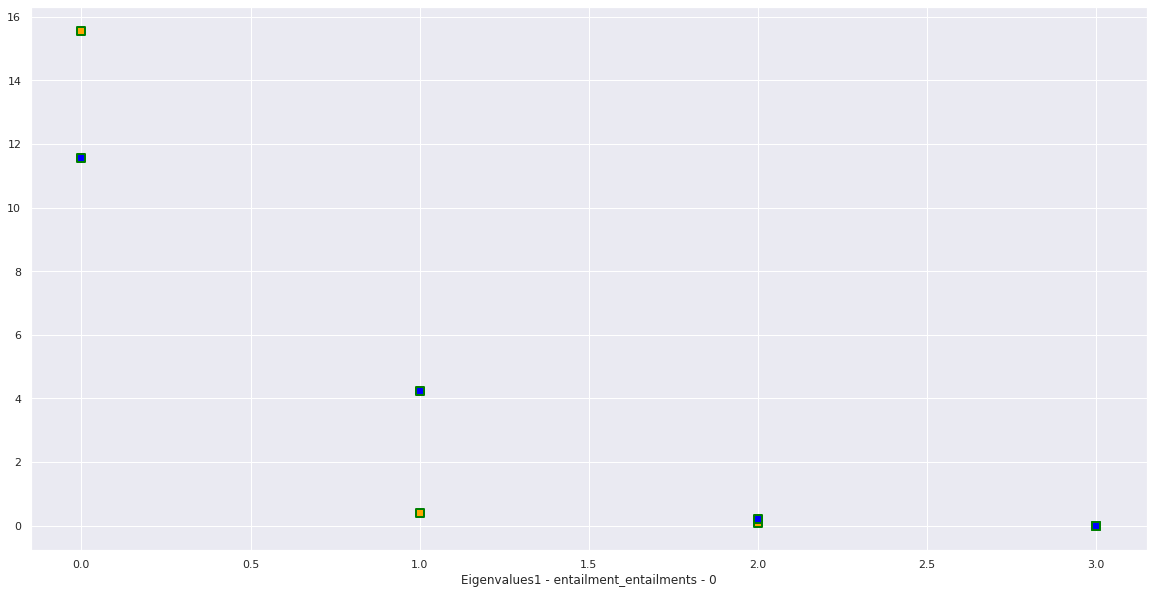

In [181]:
plt.scatter(x=np.arange(4),y=lista_evalues[2],c ="orange",
            linewidths = 2,
            marker ="s",
            edgecolor ="green",
            s = 50)
plt.scatter(x=np.arange(4),y=lista_evalues[3],c ="blue",
            linewidths = 2,
            marker ="s",
            edgecolor ="green",
            s = 50)
plt.xlabel("Eigenvalues"+lista_nombres[2])

Text(0.5, 0, 'Eigenvalues1 - contradiction_entailments - 0')

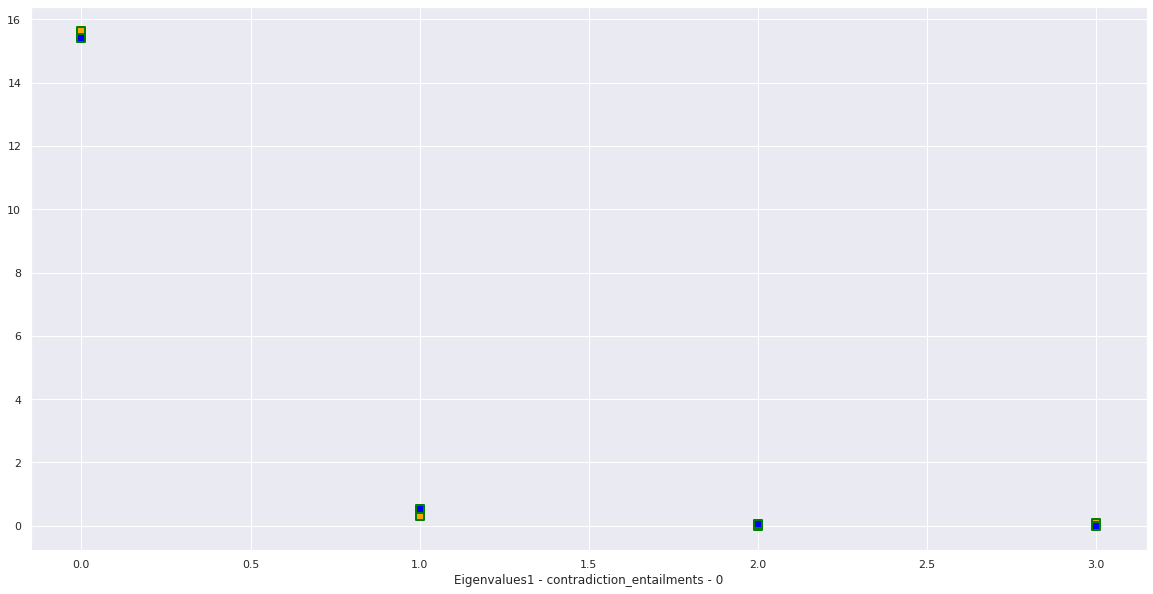

In [182]:
plt.scatter(x=np.arange(4),y=lista_evalues[0],c ="orange",
            linewidths = 2,
            marker ="s",
            edgecolor ="green",
            s = 50)
plt.scatter(x=np.arange(4),y=lista_evalues[1],c ="blue",
            linewidths = 2,
            marker ="s",
            edgecolor ="green",
            s = 50)
plt.xlabel("Eigenvalues"+lista_nombres[0])

Text(0.5, 0, 'Eigenvalues1 - entailment_neutrals - 0')

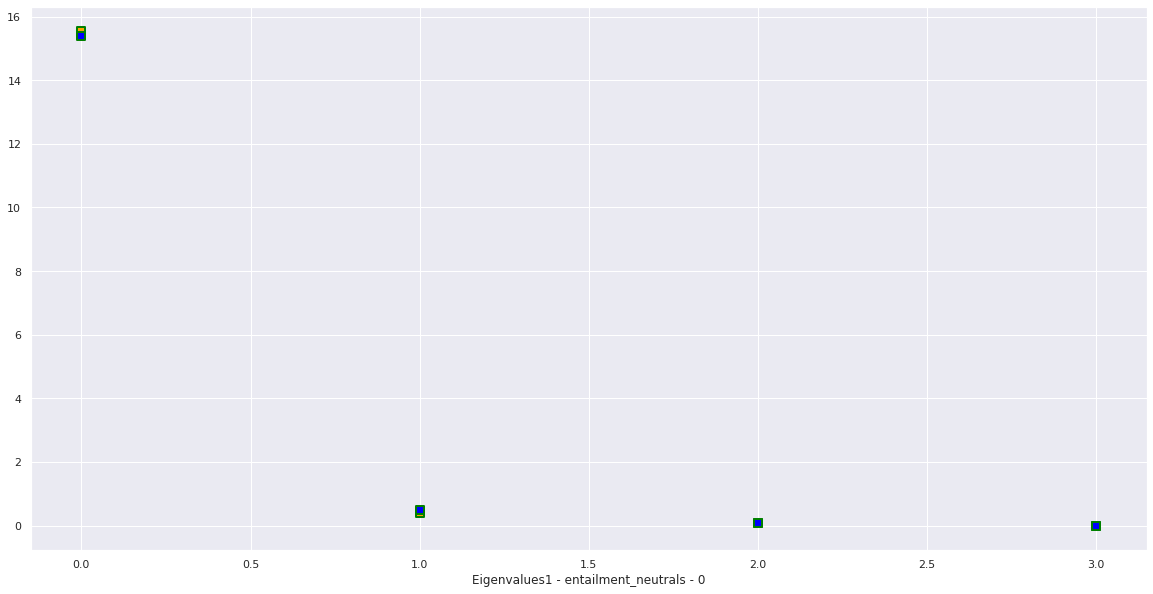

In [183]:
plt.scatter(x=np.arange(4),y=lista_evalues[4],c ="orange",
            linewidths = 2,
            marker ="s",
            edgecolor ="green",
            s = 50)
plt.scatter(x=np.arange(4),y=lista_evalues[5],c ="blue",
            linewidths = 2,
            marker ="s",
            edgecolor ="green",
            s = 50)
plt.xlabel("Eigenvalues"+lista_nombres[4])

Text(0.5, 0, 'Eigenvalues1 - neutral_neutrals - 0')

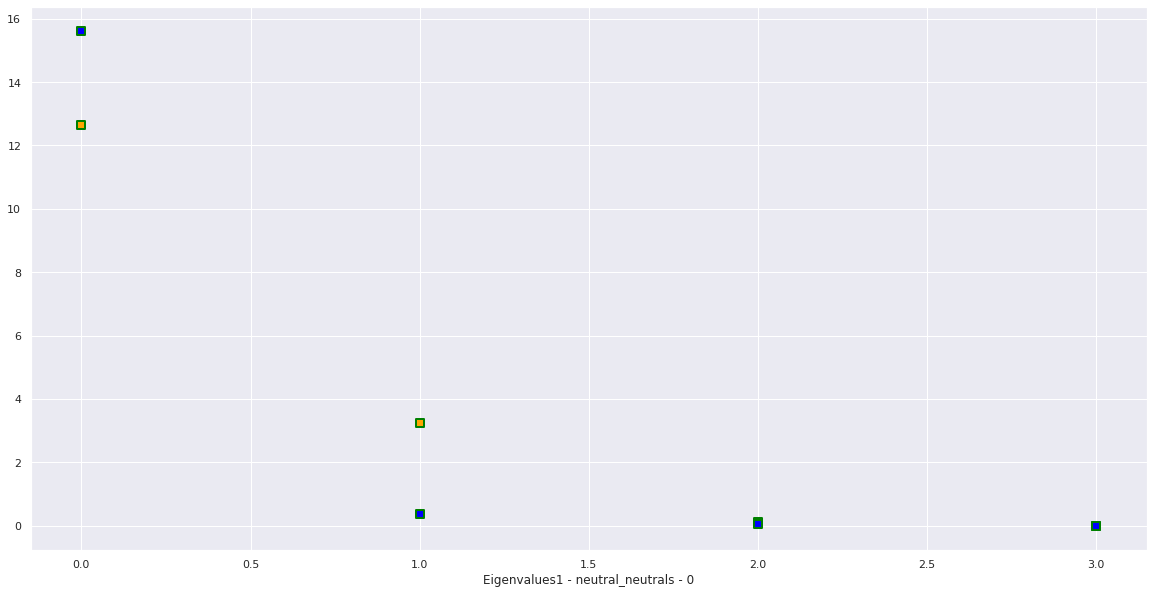

In [184]:
plt.scatter(x=np.arange(4),y=lista_evalues[6],c ="orange",
            linewidths = 2,
            marker ="s",
            edgecolor ="green",
            s = 50)
plt.scatter(x=np.arange(4),y=lista_evalues[7],c ="blue",
            linewidths = 2,
            marker ="s",
            edgecolor ="green",
            s = 50)
plt.xlabel("Eigenvalues"+lista_nombres[6])

Text(0.5, 0, 'Eigenvalues1 - contradiction_contradictions - 0')

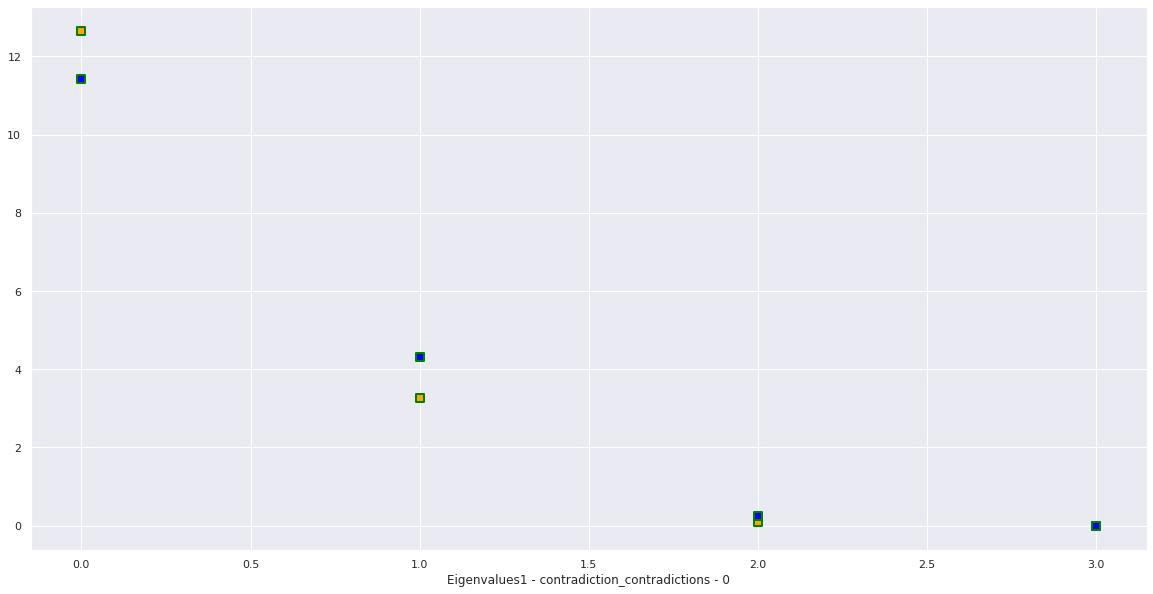

In [185]:
plt.scatter(x=np.arange(4),y=lista_evalues[8],c ="orange",
            linewidths = 2,
            marker ="s",
            edgecolor ="green",
            s = 50)
plt.scatter(x=np.arange(4),y=lista_evalues[9],c ="blue",
            linewidths = 2,
            marker ="s",
            edgecolor ="green",
            s = 50)
plt.xlabel("Eigenvalues"+lista_nombres[8])

In [186]:
lista_evalues[10]
lista_evalues[11]

array([ 8.36725122e+00, -1.60982339e-15,  5.34487956e+00,  2.28786922e+00])

Text(0.5, 0, 'Eigenvalues1 - neutral_contradictions - 0')

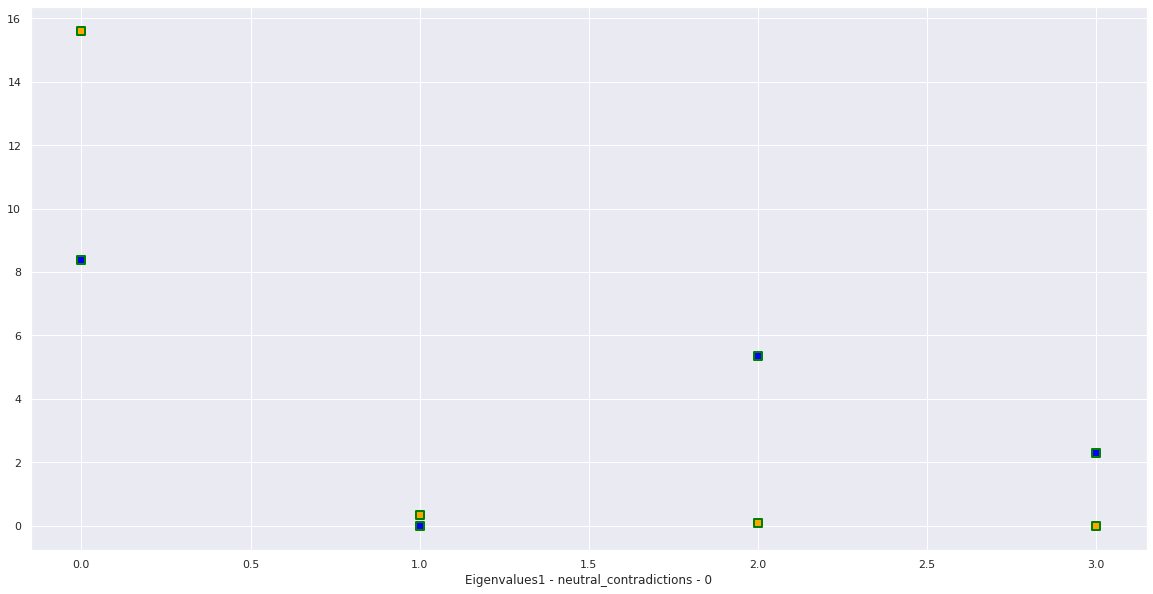

In [187]:
plt.scatter(x=np.arange(4),y=lista_evalues[10],c ="orange",
            linewidths = 2,
            marker ="s",
            edgecolor ="green",
            s = 50)
plt.scatter(x=np.arange(4),y=lista_evalues[11],c ="blue",
            linewidths = 2,
            marker ="s",
            edgecolor ="green",
            s = 50)
plt.xlabel("Eigenvalues"+lista_nombres[10])

Text(0.5, 0, 'Eigenvalues1 - neutral_contradictions - 1')

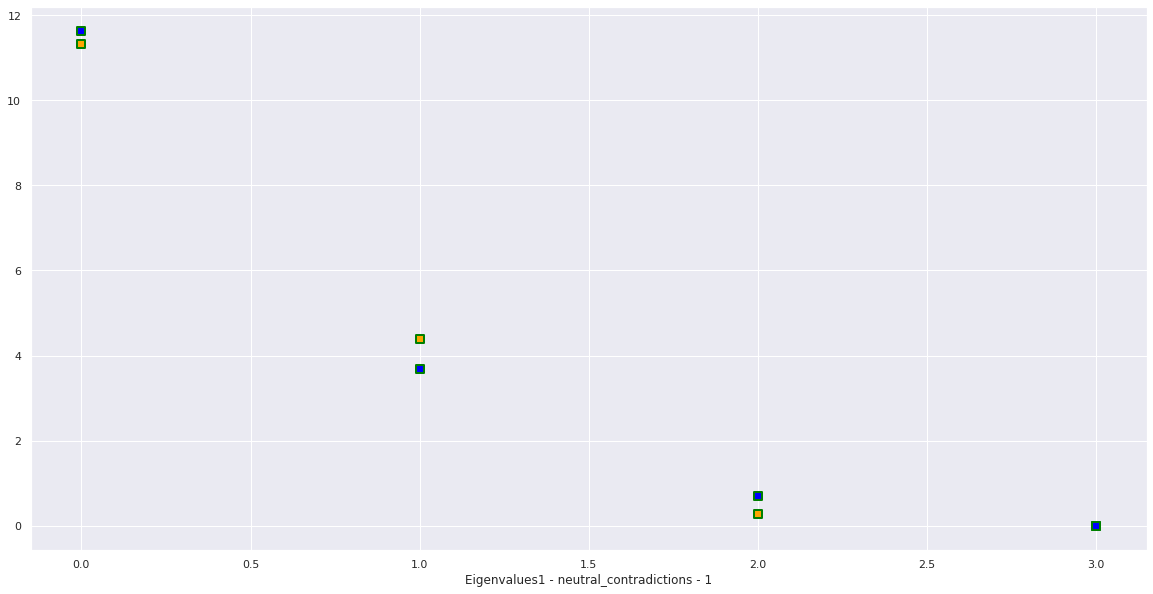

In [188]:
plt.scatter(x=np.arange(4),y=lista_evalues[12],c ="orange",
            linewidths = 2,
            marker ="s",
            edgecolor ="green",
            s = 50)
plt.scatter(x=np.arange(4),y=lista_evalues[13],c ="blue",
            linewidths = 2,
            marker ="s",
            edgecolor ="green",
            s = 50)
plt.xlabel("Eigenvalues"+lista_nombres[11])

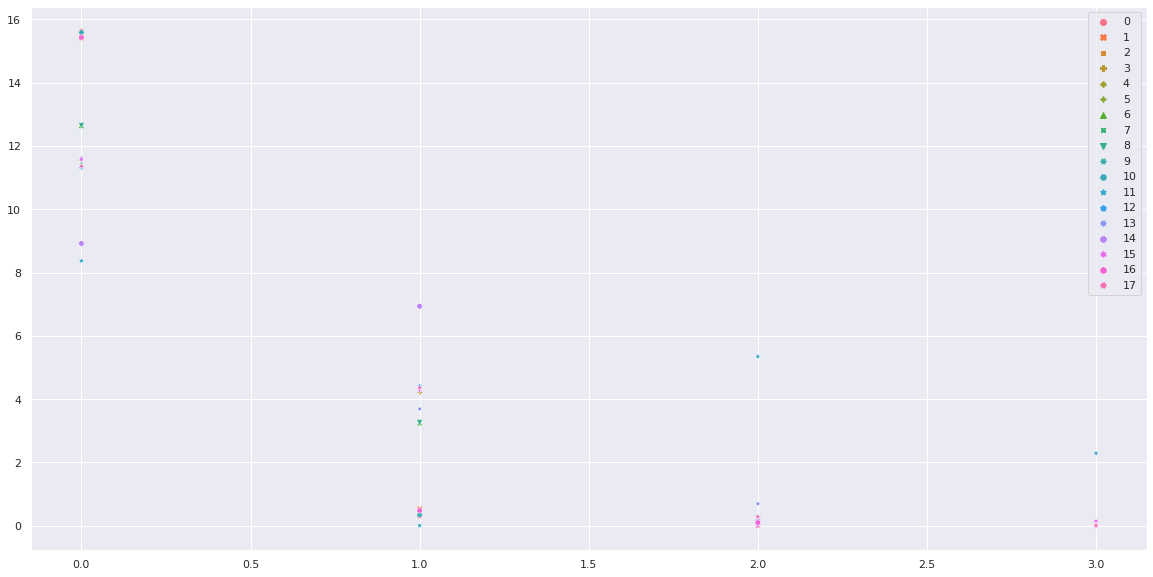

In [190]:
sns.set(rc={'figure.figsize':(20,10)})
sns.scatterplot(data=lista_evalues)
plt.show()

In [119]:
data_boxplot_global

,grupo,datos,etiqueta,paraphrase,eigenvalues,eigenvectors
108,1,"{'NOUN_NOUN': [['0.8605532', '2.2840037', '2.0...",contradiction_entailment,0,0,0
109,1,"{'NOUN_NOUN': [['1.9776106', '0.84690475', '0....",contradiction_entailment,1,0,0
110,1,"{'NOUN_NOUN': [['5.46013', '2.5968564', '2.599...",entailment_entailment,0,0,0
111,1,"{'NOUN_NOUN': [['0.7591228', '4.7579765', '0.5...",entailment_entailment,1,0,0
112,1,"{'NOUN_NOUN': [['4.7579765', '1.8833122', '2.1...",entailment_neutral,0,0,0
113,1,"{'NOUN_NOUN': [['1.8943223', '0.48259407', '0....",entailment_neutral,1,0,0
114,1,"{'NOUN_NOUN': [['3.2146893', '0.62287676', '1....",neutral_neutral,0,0,0
115,1,"{'NOUN_ADJ': [['1.3652465', '0.8041457', '1.21...",neutral_neutral,1,0,0
116,1,"{'NOUN_NOUN': [['3.8512385', '0.6572952', '0.7...",contradiction_contradiction,0,0,0
117,1,"{'NOUN_NOUN': [['2.1669703', '1.265086', '3.88...",contradiction_contradiction,1,0,0


In [120]:
lista_mapas

[      NOUN  VERB  ADV  ADJ
 NOUN   705   451   87  289
 VERB     0   120   37   74
 ADV      0     0    3    0
 ADJ      0     0   17   52,
       NOUN  VERB  ADV  ADJ
 NOUN   907   629   92  336
 VERB     0   170   40    0
 ADV      0     0    4    0
 ADJ      0   105   11   55,
        NOUN  VERB   ADV   ADJ
 NOUN  15416  9233  1631  6564
 VERB      0  2420   629     0
 ADV       0     0    80     0
 ADJ       0  1704   295  1225,
        NOUN  VERB   ADV  ADJ
 NOUN  12556  8215  1481    0
 VERB      0  2145   553    0
 ADV       0     0    64    0
 ADJ    4974  1485   202  779,
       NOUN  VERB  ADV  ADJ
 NOUN  1969  1383  161  970
 VERB     0   375   71  352
 ADV      0     0    8    0
 ADJ      0     0   46  207,
       NOUN  VERB  ADV   ADJ
 NOUN  2405  1864  206  1174
 VERB     0   510  104   443
 ADV      0     0   13    59
 ADJ      0     0    0   247,
        NOUN   VERB  ADV   ADJ
 NOUN  20247  13446    0  9641
 VERB      0   3334    0  2688
 ADV    1257    588   48   303


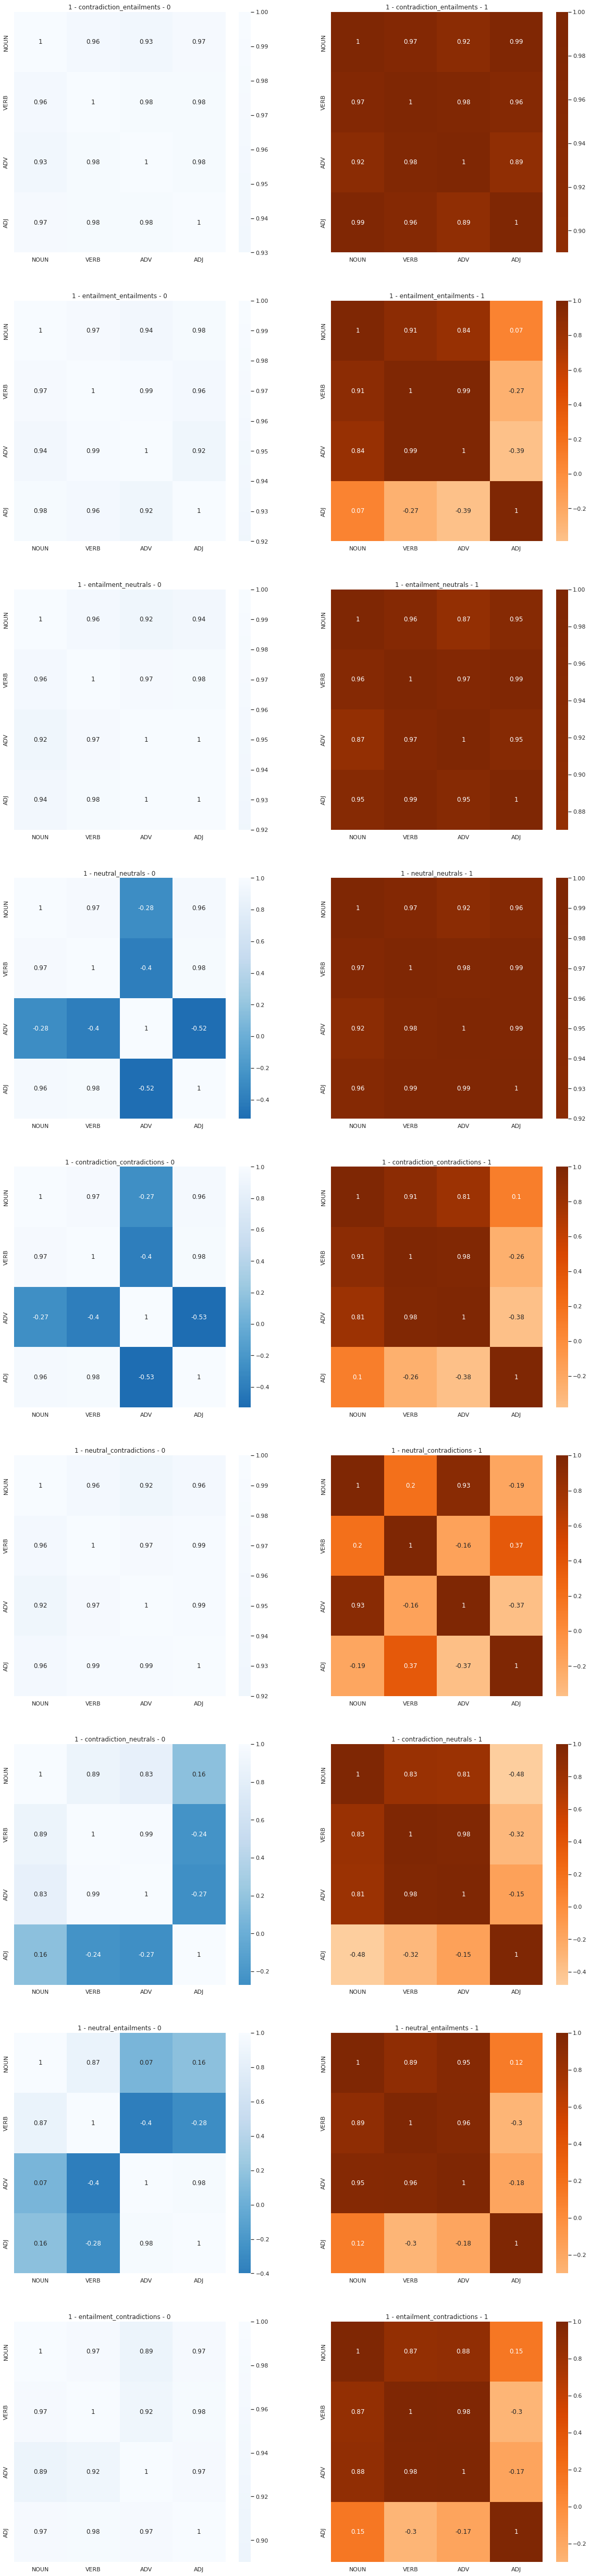

In [73]:
sns.set(rc={'figure.figsize':(20,90)})
fig,  axes= plt.subplots(9, 2)
j=0
for i in range(0,len(lista_mapas[:18]),2):
    sns.heatmap(ax=axes[j,0],data=lista_mapas[i].corr().round(2), center=0, cmap='Blues_r', annot=True)
    axes[j,0].set(title=lista_nombres[i])
    sns.heatmap(ax=axes[j,1],data=lista_mapas[i+1].corr().round(2), center=0, cmap='Oranges', annot=True)
    axes[j,1].set(title=lista_nombres[i+1])
    j=j+1
plt.show()

In [74]:
print(lista_mapas[2].corr().round(2))
print(lista_nombres[2])

      NOUN  VERB   ADV   ADJ
NOUN  1.00  0.97  0.94  0.98
VERB  0.97  1.00  0.99  0.96
ADV   0.94  0.99  1.00  0.92
ADJ   0.98  0.96  0.92  1.00
1 - entailment_entailments - 0


<AxesSubplot:>

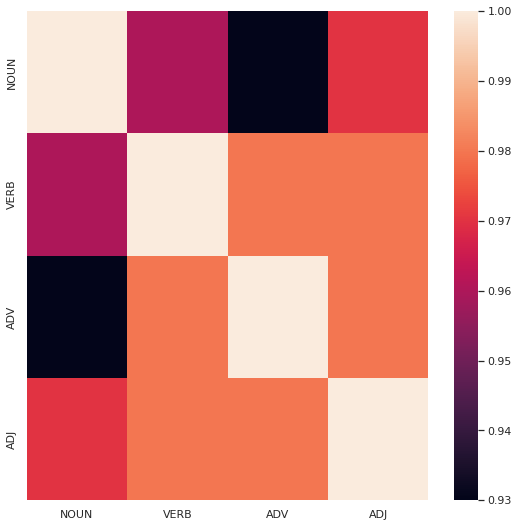

In [75]:
fig, ax = plt.subplots(figsize = (9, 9))
sns.heatmap(data=lista_mapas[0].corr().round(2))

<AxesSubplot:>

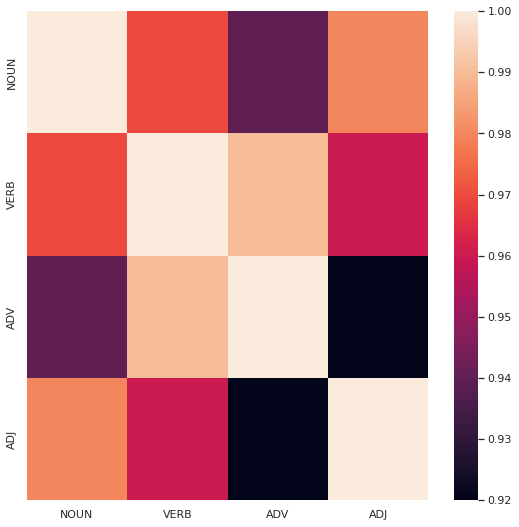

In [76]:
fig, ax = plt.subplots(figsize = (9, 9))
sns.heatmap(data=lista_mapas[2].corr().round(2))

In [77]:
import stat

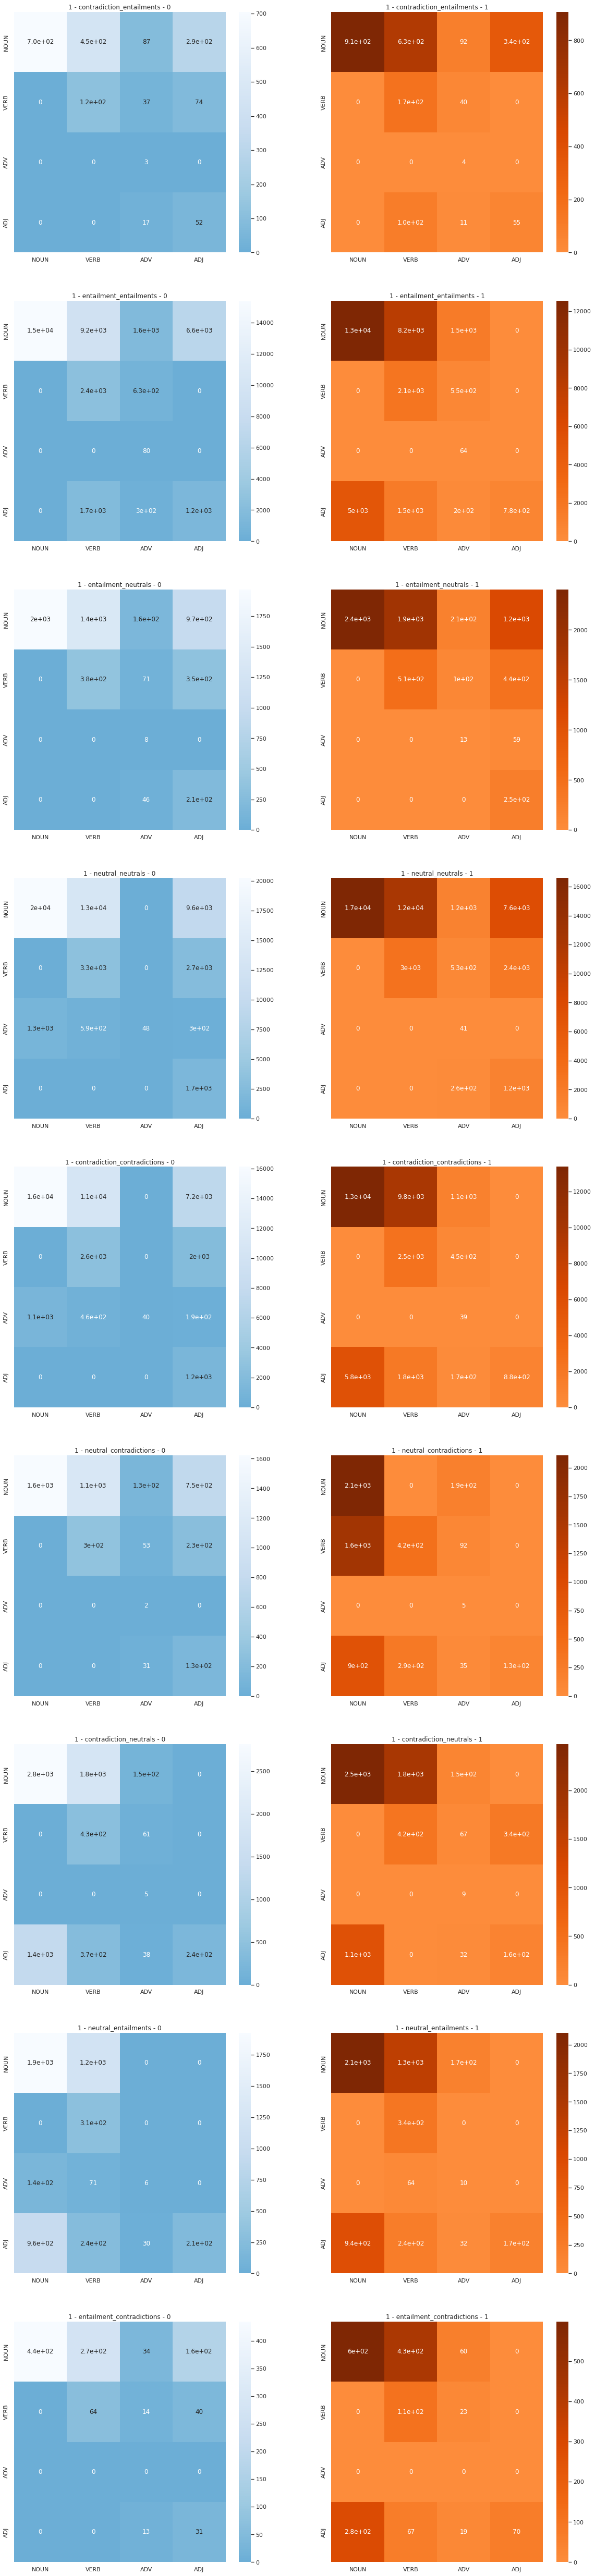

In [78]:
sns.set(rc={'figure.figsize':(20,90)})
fig,  axes= plt.subplots(9, 2)
j=0
for i in range(0,len(lista_mapas[:18]),2):
    sns.heatmap(ax=axes[j,0],data=lista_mapas[i], center=0, cmap='Blues_r', annot=True)
    axes[j,0].set(title=lista_nombres[i])
    sns.heatmap(ax=axes[j,1],data=lista_mapas[i+1], center=0, cmap='Oranges', annot=True)
    axes[j,1].set(title=lista_nombres[i+1])
    j=j+1
plt.show()

IndexError: list index out of range

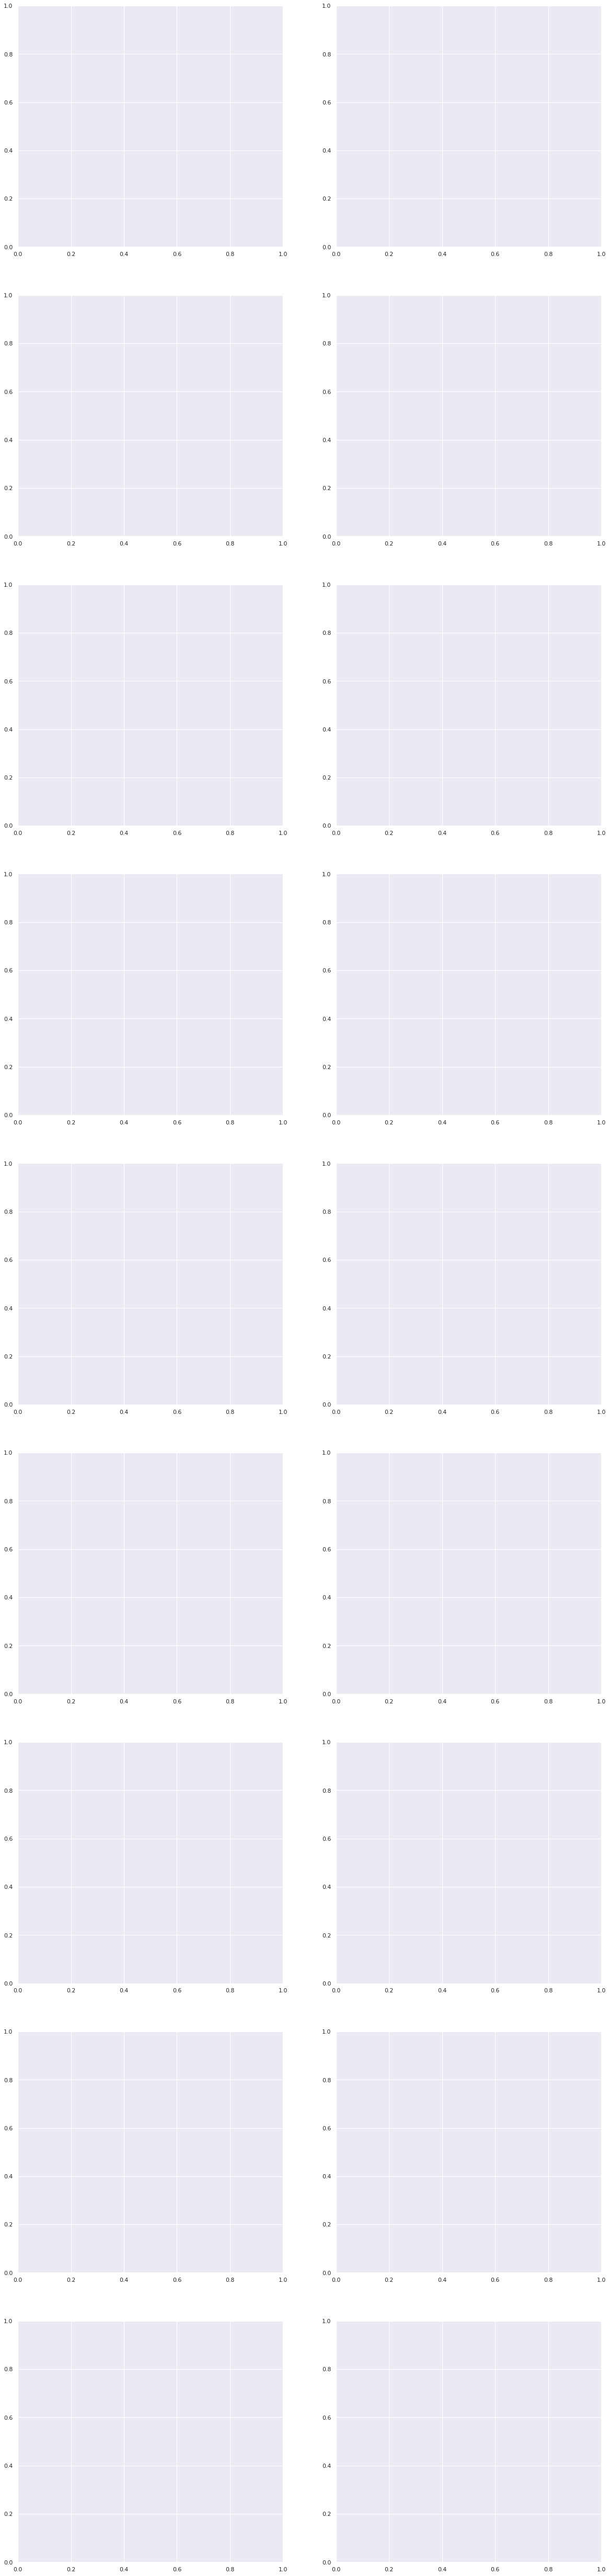

In [79]:
sns.set(rc={'figure.figsize':(20,90)})
fig,  axes= plt.subplots(9, 2)
j=0
for i in range(18,36,2):
    sns.heatmap(ax=axes[j,0],data=lista_mapas[i], center=0, cmap='Blues_r', annot=True)
    axes[j,0].set(title=lista_nombres[i])
    sns.heatmap(ax=axes[j,1],data=lista_mapas[i+1], center=0, cmap='Oranges', annot=True)
    axes[j,1].set(title=lista_nombres[i+1])
    j=j+1
plt.show()

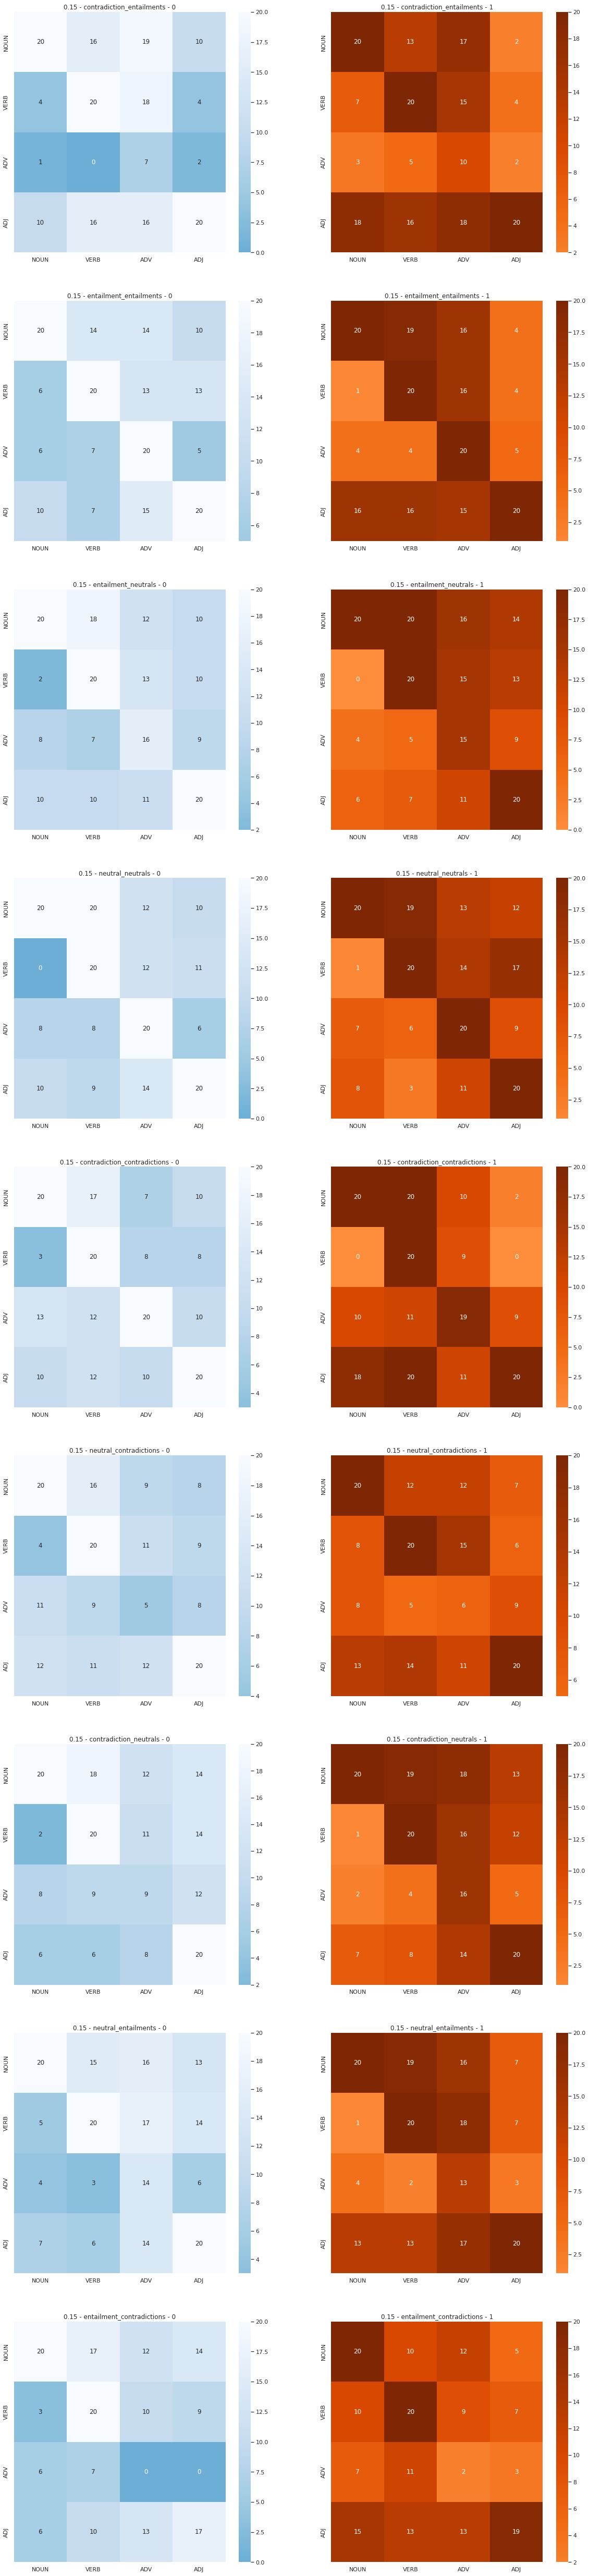

In [159]:
sns.set(rc={'figure.figsize':(20,90)})
fig,  axes= plt.subplots(9, 2)
j=0
for i in range(36,54,2):
    sns.heatmap(ax=axes[j,0],data=lista_mapas[i], center=0, cmap='Blues_r', annot=True)
    axes[j,0].set(title=lista_nombres[i])
    sns.heatmap(ax=axes[j,1],data=lista_mapas[i+1], center=0, cmap='Oranges', annot=True)
    axes[j,1].set(title=lista_nombres[i+1])
    j=j+1
plt.show()

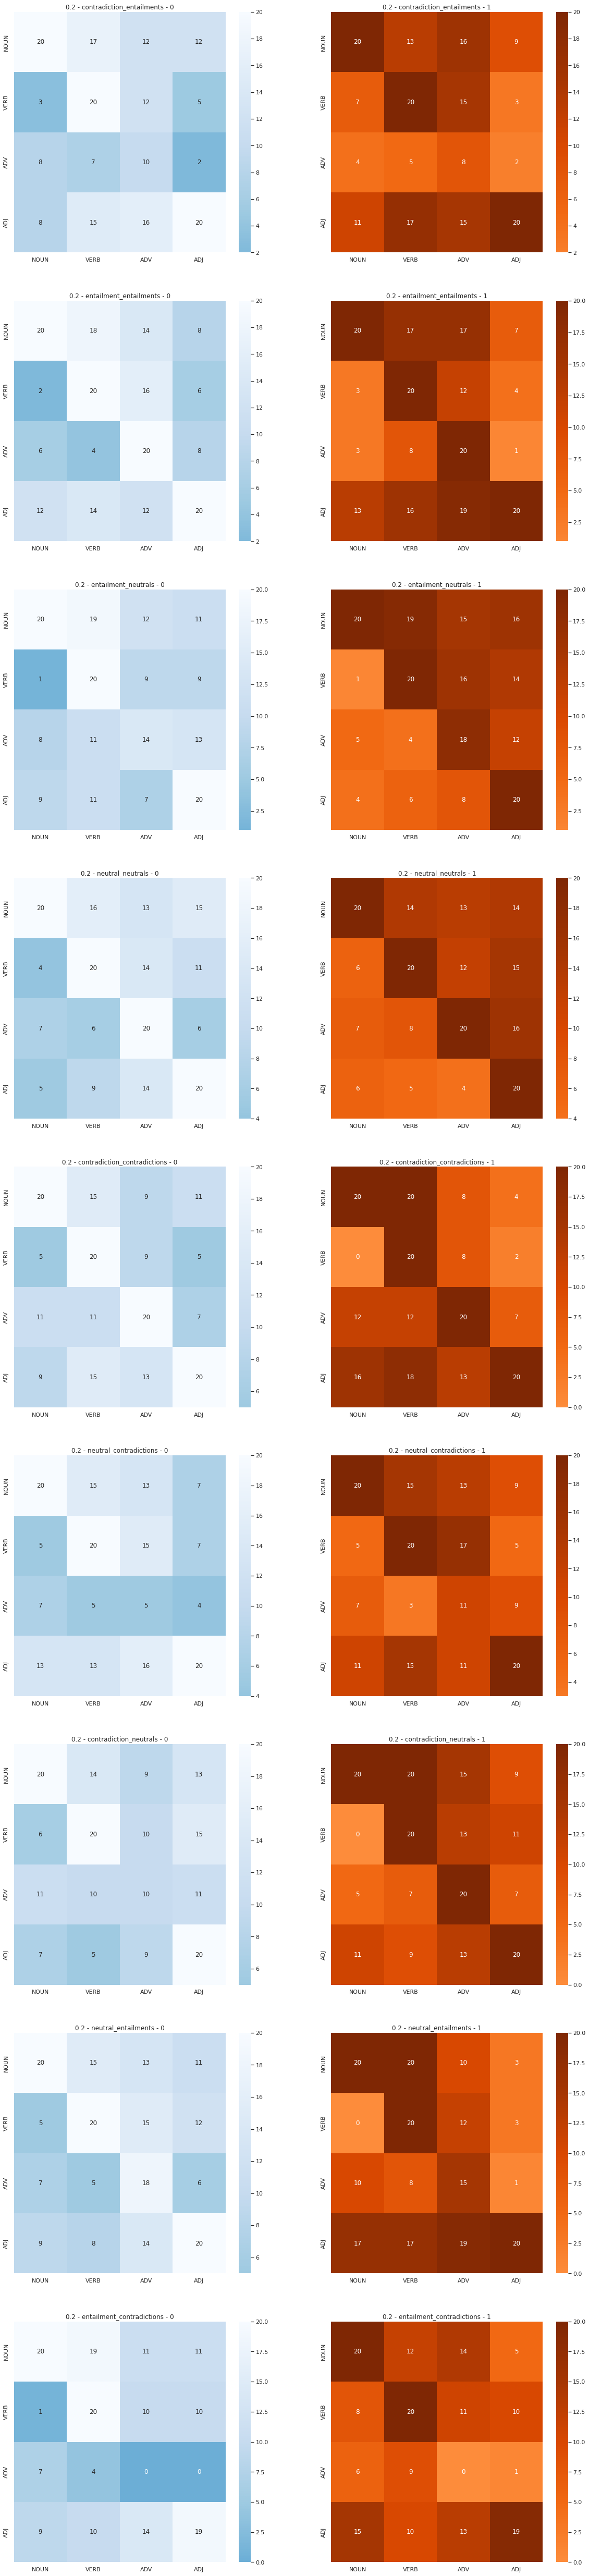

In [160]:
sns.set(rc={'figure.figsize':(20,90)})
fig,  axes= plt.subplots(9, 2)
j=0
for i in range(54,72,2):
    sns.heatmap(ax=axes[j,0],data=lista_mapas[i], center=0, cmap='Blues_r', annot=True)
    axes[j,0].set(title=lista_nombres[i])
    sns.heatmap(ax=axes[j,1],data=lista_mapas[i+1], center=0, cmap='Oranges', annot=True)
    axes[j,1].set(title=lista_nombres[i+1])
    j=j+1
plt.show()

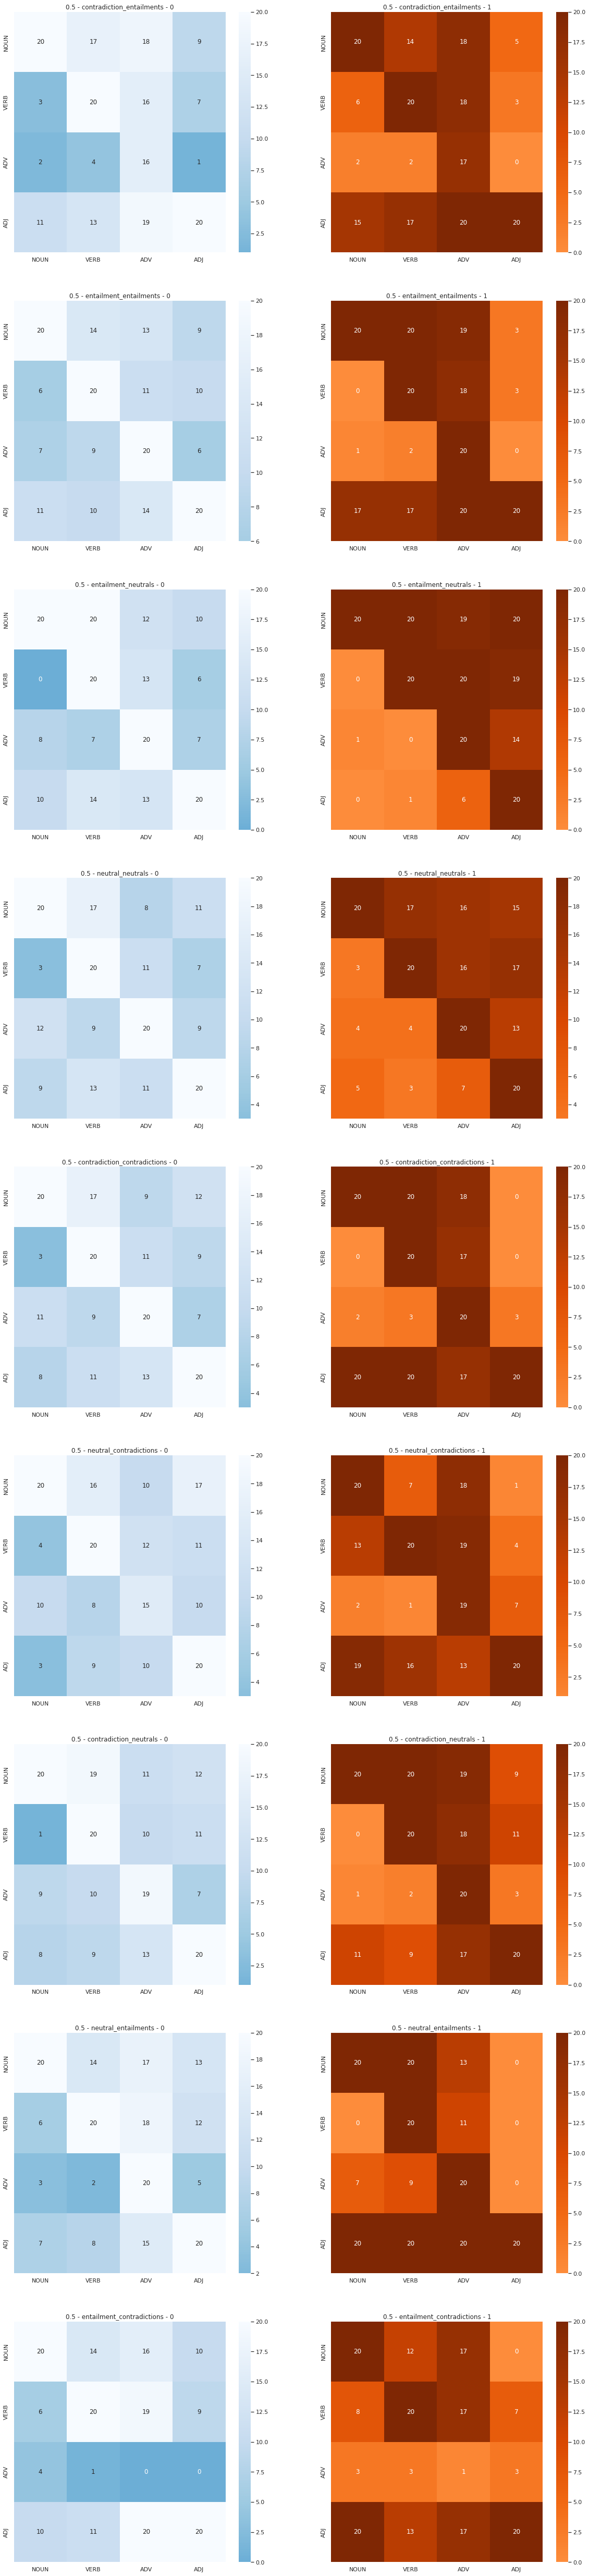

In [161]:
sns.set(rc={'figure.figsize':(20,90)})
fig,  axes= plt.subplots(9, 2)
j=0
for i in range(72,90,2):
    sns.heatmap(ax=axes[j,0],data=lista_mapas[i], center=0, cmap='Blues_r', annot=True)
    axes[j,0].set(title=lista_nombres[i])
    sns.heatmap(ax=axes[j,1],data=lista_mapas[i+1], center=0, cmap='Oranges', annot=True)
    axes[j,1].set(title=lista_nombres[i+1])
    j=j+1
plt.show()

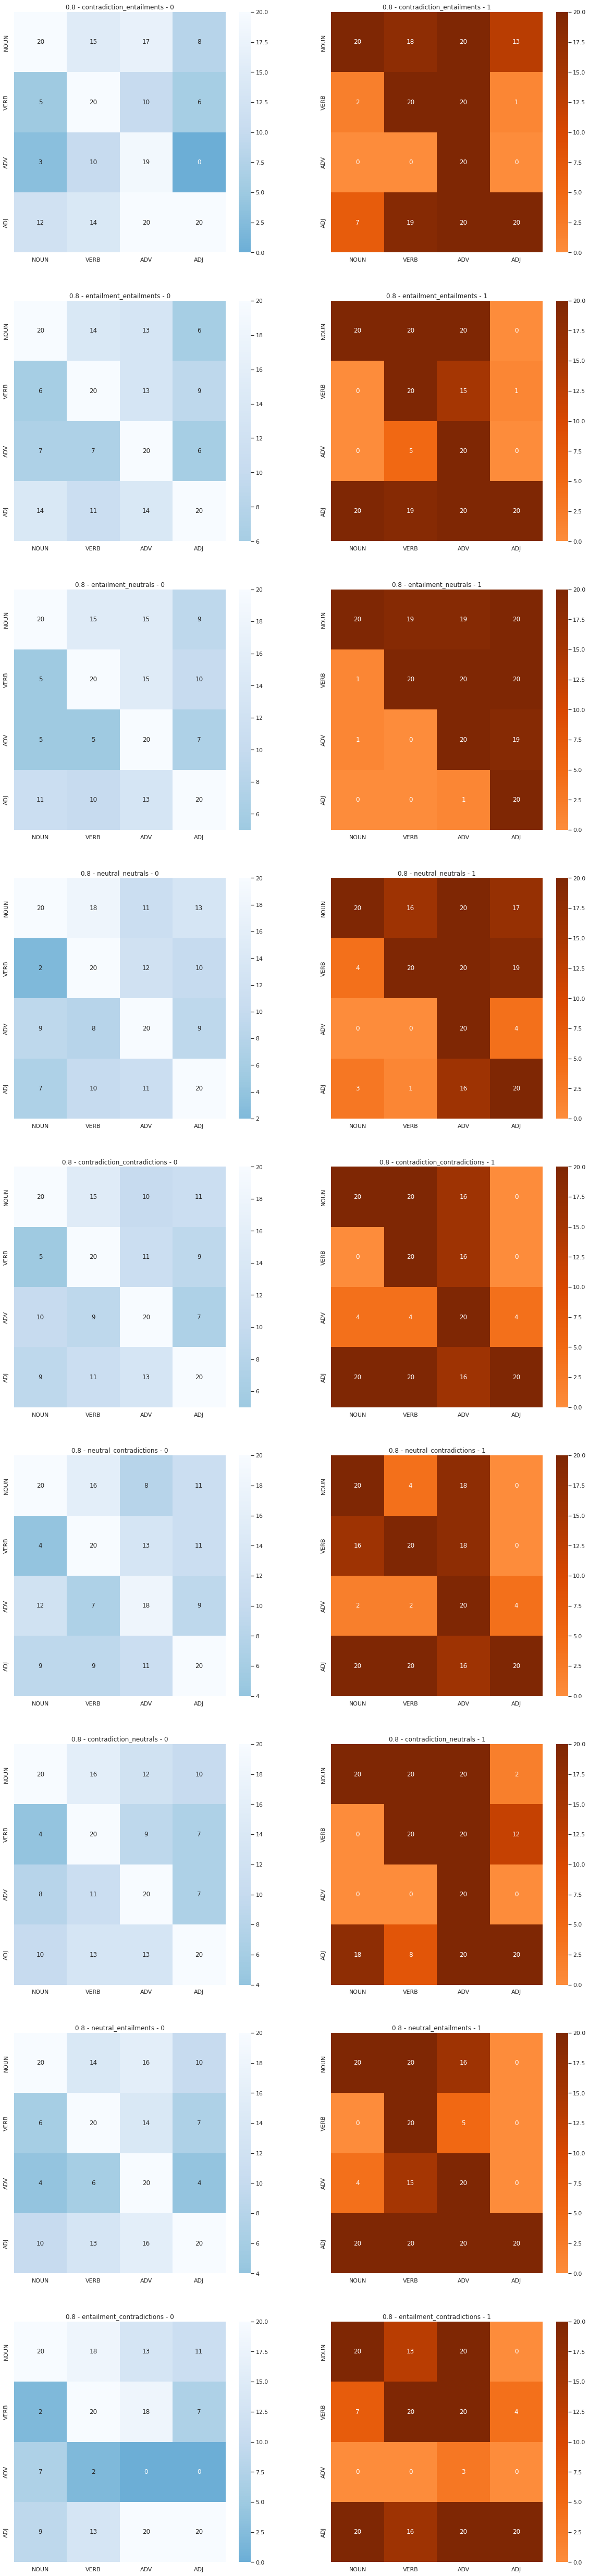

In [70]:
sns.set(rc={'figure.figsize':(20,90)})
fig,  axes= plt.subplots(9, 2)
j=0
for i in range(90,108,2):
    sns.heatmap(ax=axes[j,0],data=lista_mapas[i], center=0, cmap='Blues_r', annot=True)
    axes[j,0].set(title=lista_nombres[i])
    sns.heatmap(ax=axes[j,1],data=lista_mapas[i+1], center=0, cmap='Oranges', annot=True)
    axes[j,1].set(title=lista_nombres[i+1])
    j=j+1
plt.show()

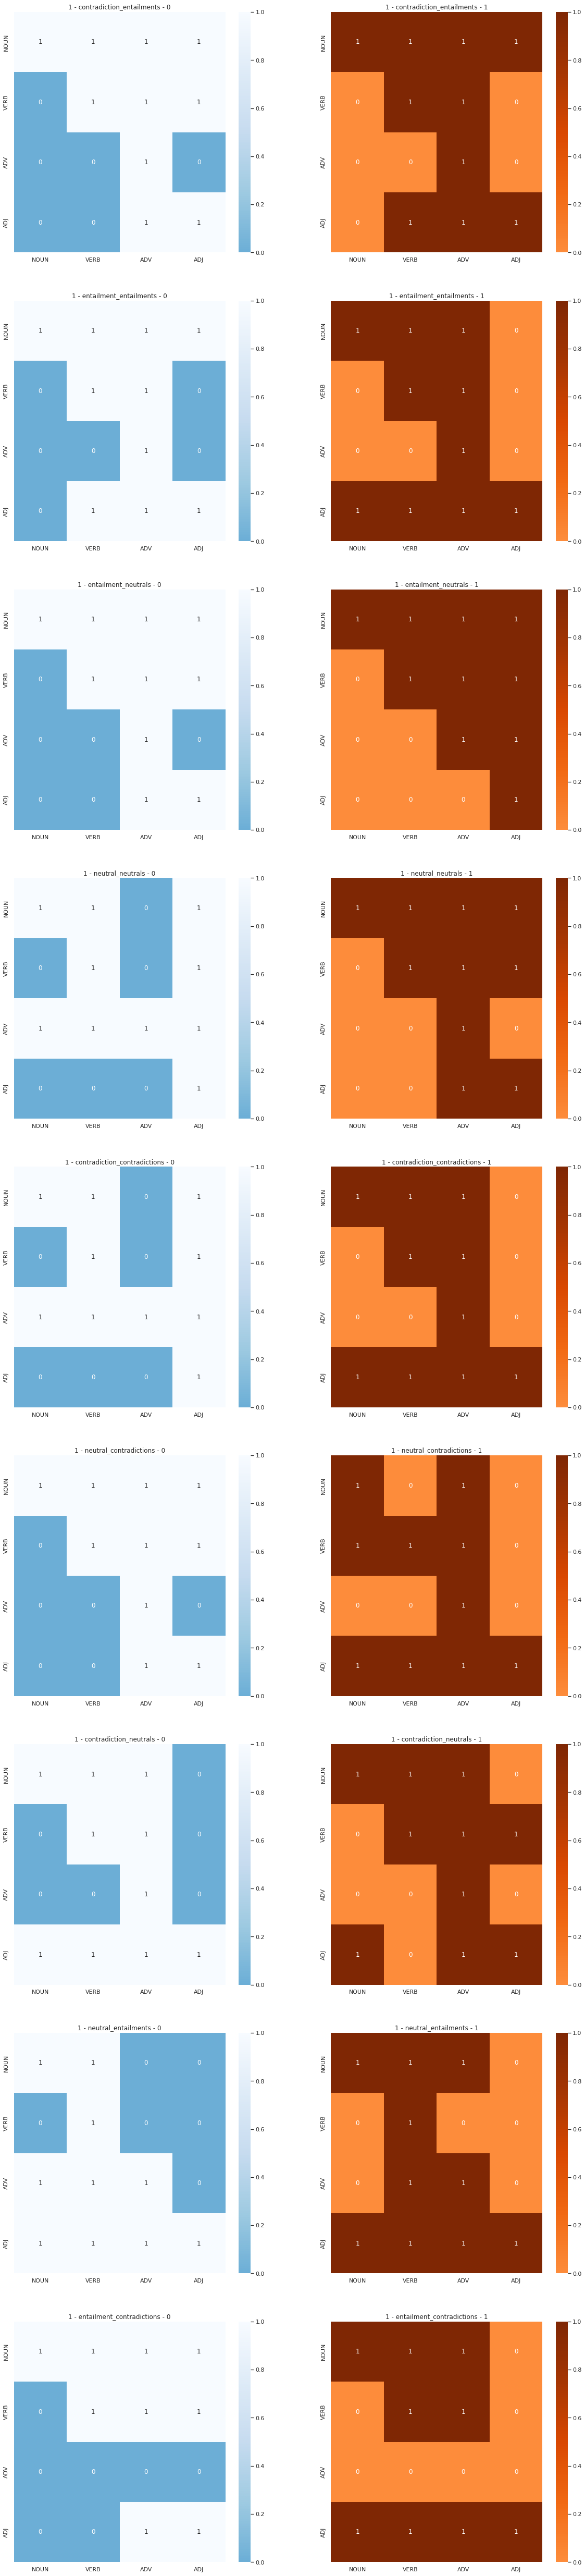

In [162]:
sns.set(rc={'figure.figsize':(20,90)})
fig,  axes= plt.subplots(9, 2)
j=0
for i in range(108,126,2):
    sns.heatmap(ax=axes[j,0],data=lista_mapas[i], center=0, cmap='Blues_r', annot=True)
    axes[j,0].set(title=lista_nombres[i])
    sns.heatmap(ax=axes[j,1],data=lista_mapas[i+1], center=0, cmap='Oranges', annot=True)
    axes[j,1].set(title=lista_nombres[i+1])
    j=j+1
plt.show()

In [163]:
lista_mapas[108]

,NOUN,VERB,ADV,ADJ
NOUN,1,1,1,1
VERB,0,1,1,1
ADV,0,0,1,0
ADJ,0,0,1,1
